In [930]:
import pandas as pd
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [931]:
# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [932]:
# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [933]:
# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [934]:
import os
import numpy as np
import math
import datetime as dt

In [935]:
# Download historical data for Bitcoin (BTC-USD)
data =pd.read_csv('C:\\Users\\Shaht\\OneDrive\\Documents\\.ipynb_checkpoints\\Enhanced_BTC_Dataset.csv')

In [936]:
# Display the first few rows of the data
print(data)

                           Date     Adj Close         Close          High  \
0     2015-01-08 00:00:00+00:00    283.348999    283.348999    294.135010   
1     2015-01-09 00:00:00+00:00    290.407989    290.407989    291.114014   
2     2015-01-10 00:00:00+00:00    274.795990    274.795990    288.127014   
3     2015-01-11 00:00:00+00:00    265.660004    265.660004    279.638000   
4     2015-01-12 00:00:00+00:00    267.795990    267.795990    272.203003   
...                         ...           ...           ...           ...   
3594  2024-11-10 00:00:00+00:00  80474.187500  80474.187500  81474.421880   
3595  2024-11-11 00:00:00+00:00  88701.484380  88701.484380  89604.500000   
3596  2024-11-12 00:00:00+00:00  87955.812500  87955.812500  89956.882810   
3597  2024-11-13 00:00:00+00:00  90584.164060  90584.164060  93434.351560   
3598  2024-11-14 00:00:00+00:00  87250.429690  87250.429690  91765.218750   

               Low          Open        Volume  Year  Month  Day  Weekday  

In [937]:
print('Total number of days present in the dataset: ', data.shape[0])
print('Total number of filedes present in the dataset:', data.shape[1])

Total number of days present in the dataset:  3599
Total number of filedes present in the dataset: 15


In [938]:
data.shape

(3599, 15)

In [939]:
data.head()

Date   Adj Close       Close        High         Low  \
0  2015-01-08 00:00:00+00:00  283.348999  283.348999  294.135010  282.174988   
1  2015-01-09 00:00:00+00:00  290.407989  290.407989  291.114014  280.532989   
2  2015-01-10 00:00:00+00:00  274.795990  274.795990  288.127014  273.966003   
3  2015-01-11 00:00:00+00:00  265.660004  265.660004  279.638000  265.039001   
4  2015-01-12 00:00:00+00:00  267.795990  267.795990  272.203003  265.200012   

         Open      Volume  Year  Month  Day  Weekday  7_day_MA_Close  \
0  294.135010  19982500.0  2015      1    8        3      285.522574   
1  282.382996  18718600.0  2015      1    9        4      282.004857   
2  287.303009  15264300.0  2015      1   10        5      281.106855   
3  274.608002  18200800.0  2015      1   11        6      281.316140   
4  266.145996  18880300.0  2015      1   12        0      280.362139   

   Lag_1_Close  Lag_7_Close  Pct_Change_Close  
0   294.337006   314.248993         -3.733138  
1   283.348999   315.032013          2.491271  
2   290.407989   281.082001         -5.375885  
3   274.795990   264.195007         -3.324643  
4   265.660004   274.473999          0.804030

In [940]:
data.tail()

Date    Adj Close        Close         High  \
3594  2024-11-10 00:00:00+00:00  80474.18750  80474.18750  81474.42188   
3595  2024-11-11 00:00:00+00:00  88701.48438  88701.48438  89604.50000   
3596  2024-11-12 00:00:00+00:00  87955.81250  87955.81250  89956.88281   
3597  2024-11-13 00:00:00+00:00  90584.16406  90584.16406  93434.35156   
3598  2024-11-14 00:00:00+00:00  87250.42969  87250.42969  91765.21875   

              Low         Open        Volume  Year  Month  Day  Weekday  \
3594  76565.42969  76775.54688  8.257059e+10  2024     11   10        6   
3595  80283.25000  80471.41406  1.180000e+11  2024     11   11        0   
3596  85155.10938  88705.56250  1.340000e+11  2024     11   12        1   
3597  86256.92969  87929.96875  1.240000e+11  2024     11   13        2   
3598  86682.81250  90574.88281  8.761671e+10  2024     11   14        3   

      7_day_MA_Close  Lag_1_Close  Lag_7_Close  Pct_Change_Close  
3594     74644.79130  76778.86719  68741.11719          4.812939  
3595     77629.07366  80474.18750  67811.50781         10.223523  
3596     80285.68081  88701.48438  69359.56250         -0.840653  
3597     82420.69308  87955.81250  75639.07813          2.988264  
3598     84041.48884  90584.16406  75904.85938         -3.680262

In [941]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599 entries, 0 to 3598
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3599 non-null   object 
 1   Adj Close         3599 non-null   float64
 2   Close             3599 non-null   float64
 3   High              3599 non-null   float64
 4   Low               3599 non-null   float64
 5   Open              3599 non-null   float64
 6   Volume            3599 non-null   float64
 7   Year              3599 non-null   int64  
 8   Month             3599 non-null   int64  
 9   Day               3599 non-null   int64  
 10  Weekday           3599 non-null   int64  
 11  7_day_MA_Close    3599 non-null   float64
 12  Lag_1_Close       3599 non-null   float64
 13  Lag_7_Close       3599 non-null   float64
 14  Pct_Change_Close  3599 non-null   float64
dtypes: float64(10), int64(4), object(1)
memory usage: 421.9+ KB


In [942]:
data.describe()

Adj Close         Close          High           Low          Open  \
count   3599.000000   3599.000000   3599.000000   3599.000000   3599.000000   
mean   19178.892924  19178.892924  19590.347820  18701.738583  19155.953008   
std    20522.222315  20522.222315  20955.009167  20017.137638  20495.094188   
min      178.102997    178.102997    211.731003    171.509995    176.897003   
25%     2543.805054   2543.805054   2615.984986   2480.714966   2543.515014   
50%     9538.024414   9538.024414   9711.889648   9347.593750   9533.784180   
75%    30438.949220  30438.949220  31016.435545  29944.603515  30432.759770   
max    90584.164060  90584.164060  93434.351560  86682.812500  90574.882810   

             Volume         Year        Month          Day  Weekday  \
count  3.599000e+03  3599.000000  3599.000000  3599.000000   3599.0   
mean   1.854400e+10  2019.450403     6.465963    15.721867      3.0   
std    1.957682e+10     2.841119     3.415606     8.796327      2.0   
min    1.060090e+07  2015.000000     1.000000     1.000000      0.0   
25%    1.152575e+09  2017.000000     4.000000     8.000000      1.0   
50%    1.522294e+10  2019.000000     6.000000    16.000000      3.0   
75%    2.958483e+10  2022.000000     9.000000    23.000000      5.0   
max    3.510000e+11  2024.000000    12.000000    31.000000      6.0   

       7_day_MA_Close   Lag_1_Close   Lag_7_Close  Pct_Change_Close  
count     3599.000000   3599.000000   3599.000000       3599.000000  
mean     19106.407960  19154.731743  19015.997436          0.224934  
std      20411.354293  20493.225197  20336.794740          3.636603  
min        204.545569    178.102997    178.102997        -37.169539  
25%       2544.435006   2534.385009   2509.140015         -1.214786  
50%       9490.900949   9536.892578   9519.145508          0.139112  
75%      30403.003490  30429.202150  30338.166995          1.689504  
max      84041.488840  90584.164060  75904.859380         25.247169

Checking Null Values

In [944]:
print('Null Values:', data.isnull().sum().sum())

Null Values: 0


In [945]:
print('NA Values:',data.isnull().any().any())

NA Values: False


In [946]:
sd=data.iloc[0][0]
ed=data.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2015-01-08 00:00:00+00:00
Ending Date 2024-11-14 00:00:00+00:00


C:\Users\Shaht\AppData\Local\Temp\ipykernel_17092\1810915230.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Shaht\AppData\Local\Temp\ipykernel_17092\1810915230.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Analysis of year 2015

In [948]:
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d" " 00:00:00+00:00")

y_2015 = data.loc[(data['Date'] >= '2015-01-01')
                     & (data['Date'] < '2015-12-31')]

y_2015.drop(y_2015[['Adj Close','Volume']],axis=1)

Date       Close        High         Low        Open  Year  Month  \
0   2015-01-08  283.348999  294.135010  282.174988  294.135010  2015      1   
1   2015-01-09  290.407989  291.114014  280.532989  282.382996  2015      1   
2   2015-01-10  274.795990  288.127014  273.966003  287.303009  2015      1   
3   2015-01-11  265.660004  279.638000  265.039001  274.608002  2015      1   
4   2015-01-12  267.795990  272.203003  265.200012  266.145996  2015      1   
..         ...         ...         ...         ...         ...   ...    ...   
352 2015-12-26  417.273987  457.489014  405.760010  455.756012  2015     12   
353 2015-12-27  422.822998  424.006988  408.882996  416.514008  2015     12   
354 2015-12-28  422.278992  429.769012  418.480988  423.342987  2015     12   
355 2015-12-29  432.983002  432.983002  420.627014  422.097992  2015     12   
356 2015-12-30  426.619995  434.386993  422.084015  433.299988  2015     12   

     Day  Weekday  7_day_MA_Close  Lag_1_Close  Lag_7_Close  Pct_Change_Close  
0      8        3      285.522574   294.337006   314.248993         -3.733138  
1      9        4      282.004857   283.348999   315.032013          2.491271  
2     10        5      281.106855   290.407989   281.082001         -5.375885  
3     11        6      281.316140   274.795990   264.195007         -3.324643  
4     12        0      280.362139   265.660004   274.473999          0.804030  
..   ...      ...             ...          ...          ...               ...  
352   26        5      441.172712   455.653015   462.321991         -8.422863  
353   27        6      438.335284   417.273987   442.684998          1.329824  
354   28        0      435.998138   422.822998   438.639008         -0.128661  
355   29        1      435.485426   422.278992   436.571991          2.534819  
356   30        2      433.230996   432.983002   442.401001         -1.469574  

[357 rows x 13 columns]

In [949]:
#month wise onpen and closing price
monthvise= y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open       Close
Date                             
January    239.563293  236.779207
February   232.821856  234.153645
March      269.278419  269.042259
April      235.708667  235.491534
May        237.161806  236.997001
June       236.941433  238.081766
July       278.857679  279.563740
August     252.986774  250.733805
September  233.486733  233.595533
October    262.306000  264.855356
November   346.866833  348.883332
December   422.509468  424.261133

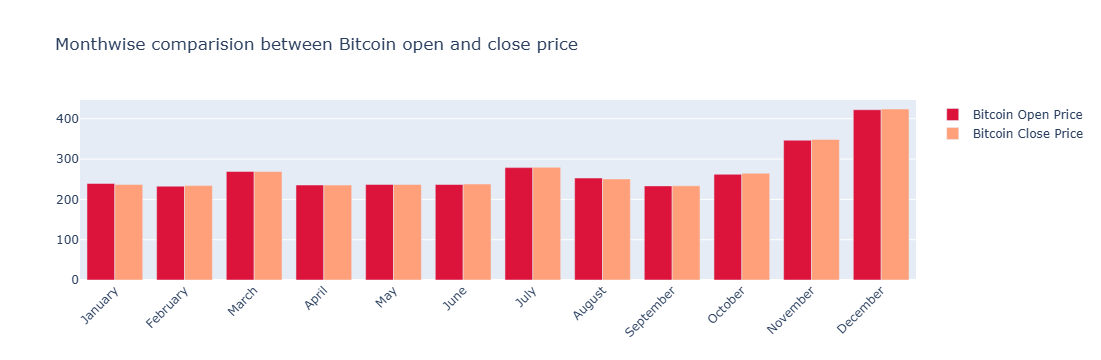

In [950]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

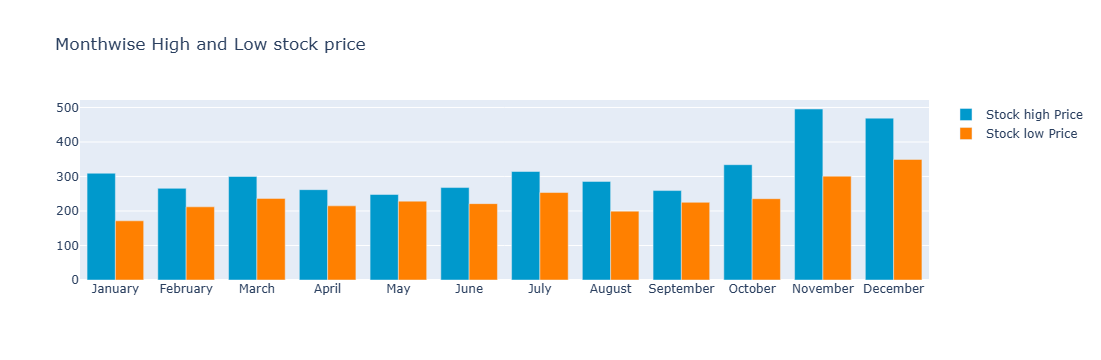

In [951]:
y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2015.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

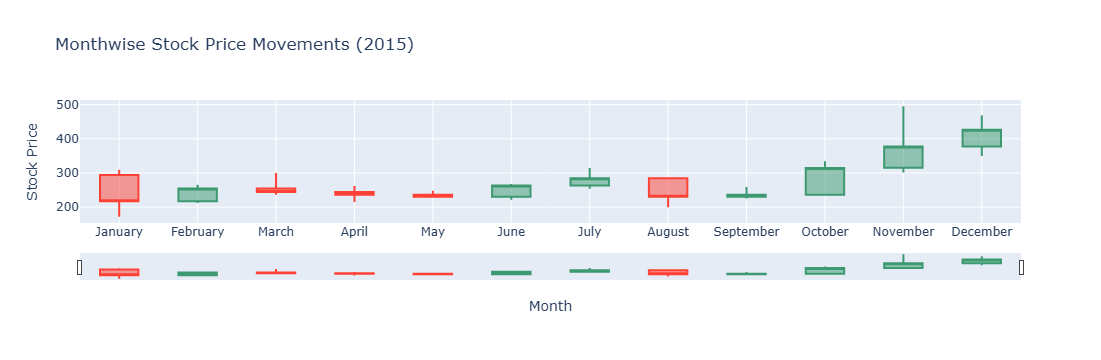

In [952]:
y_2015.loc[:, 'Date'] = pd.to_datetime(y_2015['Date'])

# Group by month
monthly_data = y_2015.groupby(y_2015['Date'].dt.strftime('%B')).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

# Reindex to maintain the correct month order
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = monthly_data.reindex(new_order, axis=0)

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=monthly_data.index,
    open=monthly_data['Open'],
    high=monthly_data['High'],
    low=monthly_data['Low'],
    close=monthly_data['Close']
)])

# Update layout
fig.update_layout(
    title='Monthwise Stock Price Movements (2015)',
    xaxis_title='Month',
    yaxis_title='Stock Price',
    xaxis=dict(type='category'),  # Ensures correct ordering of months
    template='plotly'
)

fig.show()

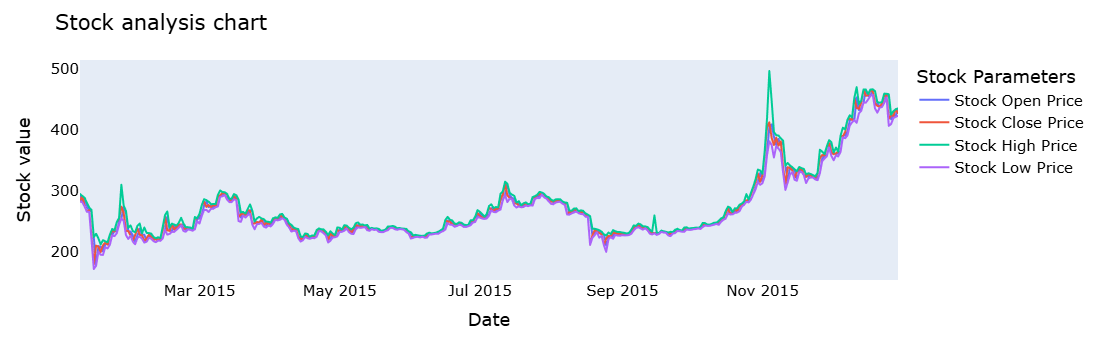

In [1222]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2015, x=y_2015.Date, y=[y_2015['Open'], y_2015['Close'], 
                                          y_2015['High'], y_2015['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Analysis of year 2016

In [955]:
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d" " 00:00:00+00:00")

y_2016 = data.loc[(data['Date'] >= '2016-01-01')
                     & (data['Date'] < '2016-12-31')]

y_2016.drop(y_2016[['Adj Close','Volume']],axis=1)

Date       Close        High         Low        Open  Year  Month  \
358 2016-01-01  434.334015  436.246002  427.515015  430.721008  2016      1   
359 2016-01-02  433.437988  436.062012  431.869995  434.622009  2016      1   
360 2016-01-03  430.010986  433.743012  424.705994  433.578003  2016      1   
361 2016-01-04  433.091003  434.516998  429.084015  430.061005  2016      1   
362 2016-01-05  431.959992  434.182007  429.675995  433.069000  2016      1   
..         ...         ...         ...         ...         ...   ...    ...   
718 2016-12-26  907.609985  913.184021  896.898010  896.905029  2016     12   
719 2016-12-27  933.197998  940.047974  904.255005  908.354004  2016     12   
720 2016-12-28  975.921021  975.921021  934.830994  934.830994  2016     12   
721 2016-12-29  973.497009  979.396973  954.502991  975.125000  2016     12   
722 2016-12-30  961.237976  972.534973  934.833008  972.534973  2016     12   

     Day  Weekday  7_day_MA_Close  Lag_1_Close  Lag_7_Close  Pct_Change_Close  
358    1        4      426.697139   430.566986   455.653015          0.874900  
359    2        5      429.006282   434.334015   417.273987         -0.206299  
360    3        6      430.033138   433.437988   422.822998         -0.790656  
361    4        0      431.577711   430.010986   422.278992          0.716265  
362    5        1      431.431566   433.091003   432.983002         -0.261149  
..   ...      ...             ...          ...          ...               ...  
718   26        0      874.899423   896.182983   792.713989          1.275075  
719   27        1      893.802569   907.609985   800.875977          2.819274  
720   28        2      914.036856   933.197998   834.281006          4.578131  
721   29        3      929.602147   975.921021   864.539978         -0.248382  
722   30        4      935.209856   973.497009   921.984009         -1.259278  

[365 rows x 13 columns]

In [956]:
#month wise onpen and closing price
monthvise= y_2016.groupby(y_2016['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open       Close
Date                             
January    412.805902  410.844485
February   402.304692  404.408274
March      417.262033  416.525774
April      433.487433  434.339398
May        459.237547  461.954415
June       638.544834  642.869061
July       662.977779  661.356103
August     581.238966  579.585197
September  604.614034  605.848633
October    640.702546  643.550935
November   725.073804  726.349101
December   816.457629  823.537602

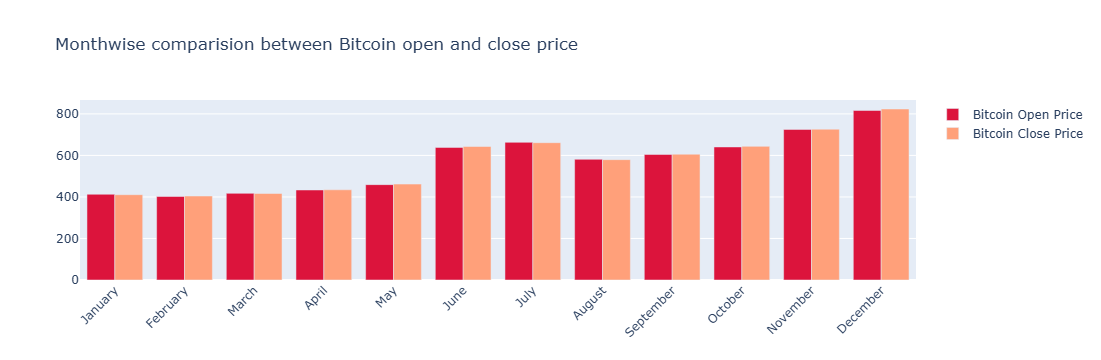

In [957]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

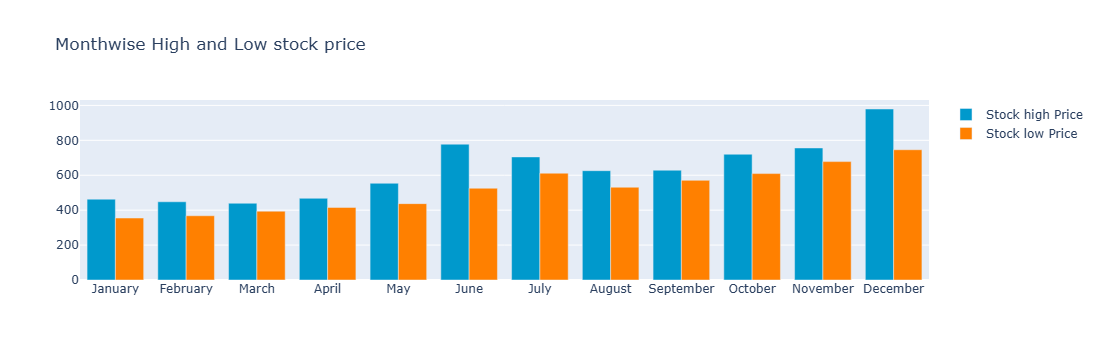

In [958]:
y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2016.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

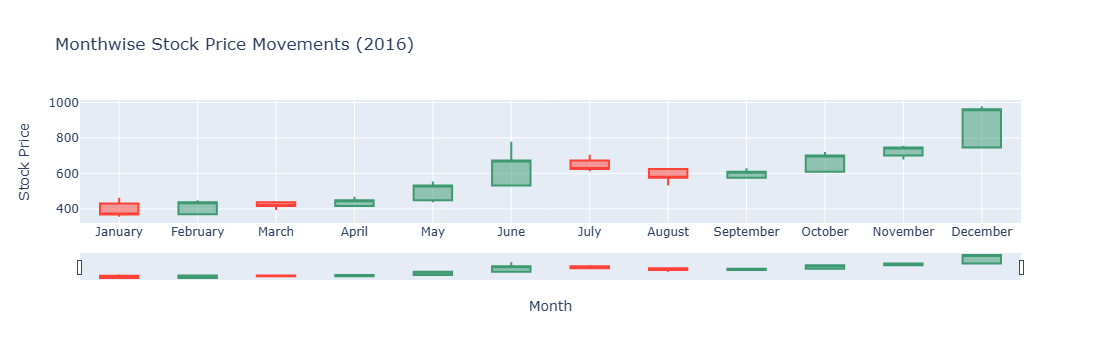

In [959]:
y_2016.loc[:, 'Date'] = pd.to_datetime(y_2016['Date'])

# Group by month
monthly_data = y_2016.groupby(y_2016['Date'].dt.strftime('%B')).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

# Reindex to maintain the correct month order
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = monthly_data.reindex(new_order, axis=0)

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=monthly_data.index,
    open=monthly_data['Open'],
    high=monthly_data['High'],
    low=monthly_data['Low'],
    close=monthly_data['Close']
)])

# Update layout
fig.update_layout(
    title='Monthwise Stock Price Movements (2016)',
    xaxis_title='Month',
    yaxis_title='Stock Price',
    xaxis=dict(type='category'),  # Ensures correct ordering of months
    template='plotly'
)

fig.show()

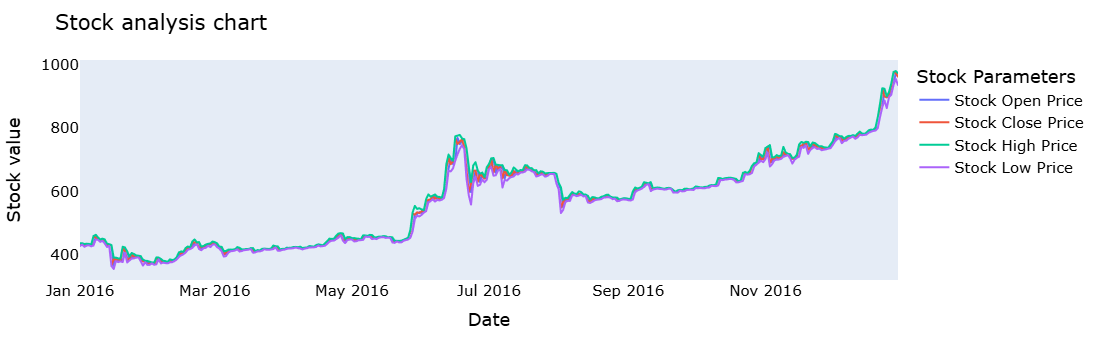

In [960]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2016, x=y_2016.Date, y=[y_2016['Open'], y_2016['Close'], 
                                          y_2016['High'], y_2016['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Analysis of year 2017

In [962]:
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d" " 00:00:00+00:00")

y_2017 = data.loc[(data['Date'] >= '2017-01-01')
                     & (data['Date'] < '2017-12-31')]

y_2017.drop(y_2017[['Adj Close','Volume']],axis=1)

Date         Close          High           Low          Open  Year  \
724  2017-01-01    998.325012   1003.080017    958.698975    963.658020  2017   
725  2017-01-02   1021.750000   1031.390015    996.702026    998.617004  2017   
726  2017-01-03   1043.839966   1044.079956   1021.599976   1021.599976  2017   
727  2017-01-04   1154.729980   1159.420044   1044.400024   1044.400024  2017   
728  2017-01-05   1013.380005   1191.099976    910.416992   1156.729980  2017   
...         ...           ...           ...           ...           ...   ...   
1083 2017-12-26  16099.799800  16461.199220  14028.900390  14036.599610  2017   
1084 2017-12-27  15838.500000  16930.900390  15114.299800  16163.500000  2017   
1085 2017-12-28  14606.500000  15888.400390  13937.299800  15864.099610  2017   
1086 2017-12-29  14656.200200  15279.000000  14307.000000  14695.799800  2017   
1087 2017-12-30  12952.200200  14681.900390  12350.099610  14681.900390  2017   

      Month  Day  Weekday  7_day_MA_Close   Lag_1_Close   Lag_7_Close  \
724       1    1        6      959.075997    963.742981    896.182983   
725       1    2        0      975.381714    998.325012    907.609985   
726       1    3        1      991.187709   1021.750000    933.197998   
727       1    4        2     1016.731846   1043.839966    975.921021   
728       1    5        3     1022.429417   1154.729980    973.497009   
...     ...  ...      ...             ...           ...           ...   
1083     12   26        1    15001.528460  14026.599610  17776.699220   
1084     12   27        2    14889.228510  16099.799800  16624.599610   
1085     12   28        3    14718.314170  15838.500000  15802.900390   
1086     12   29        4    14836.085660  14606.500000  13831.799800   
1087     12   30        5    14586.514230  14656.200200  14699.200200   

      Pct_Change_Close  
724           3.588304  
725           2.346429  
726           2.161974  
727          10.623277  
728         -12.240955  
...                ...  
1083         14.780490  
1084         -1.623000  
1085         -7.778514  
1086          0.340261  
1087        -11.626479  

[364 rows x 13 columns]

In [963]:
#month wise onpen and closing price
monthvise= y_2017.groupby(y_2017['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January      914.680971    914.916159
February    1055.620071   1062.533672
March       1133.212576   1129.365228
April       1197.646997   1206.641007
May         1865.748712   1895.383529
June        2630.573332   2636.204346
July        2509.213233   2519.418386
August      3819.812579   3880.989998
September   4077.400993   4064.836312
October     5291.370007   5360.071604
November    7685.745996   7813.132975
December   15251.136914  15332.200001

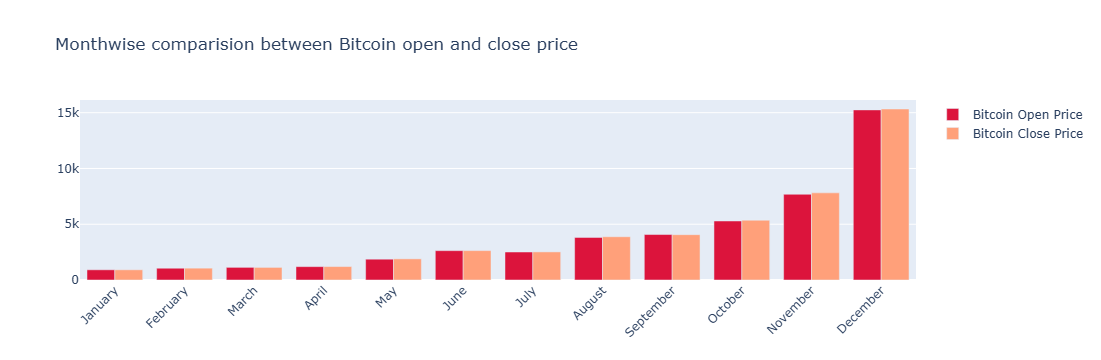

In [964]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

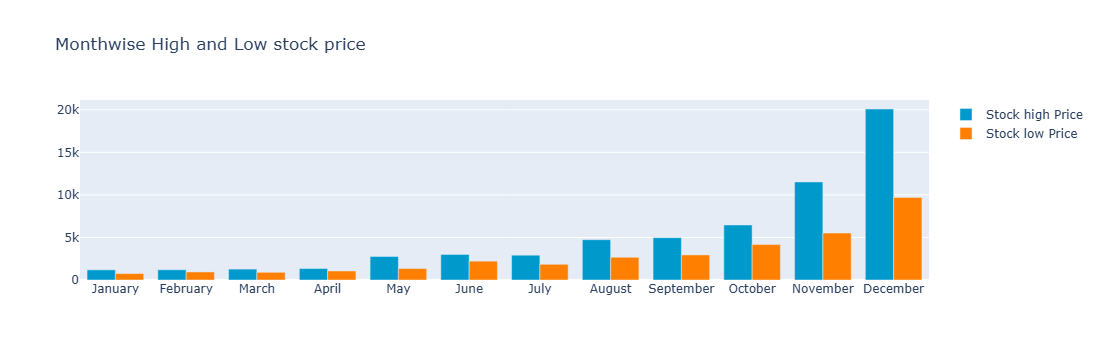

In [965]:
y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2017.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

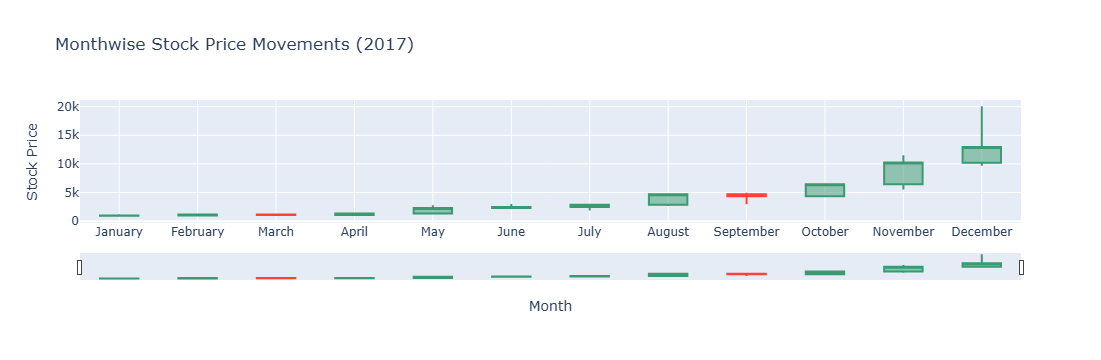

In [966]:
y_2017.loc[:, 'Date'] = pd.to_datetime(y_2017['Date'])

# Group by month
monthly_data = y_2017.groupby(y_2017['Date'].dt.strftime('%B')).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

# Reindex to maintain the correct month order
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = monthly_data.reindex(new_order, axis=0)

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=monthly_data.index,
    open=monthly_data['Open'],
    high=monthly_data['High'],
    low=monthly_data['Low'],
    close=monthly_data['Close']
)])

# Update layout
fig.update_layout(
    title='Monthwise Stock Price Movements (2017)',
    xaxis_title='Month',
    yaxis_title='Stock Price',
    xaxis=dict(type='category'),  # Ensures correct ordering of months
    template='plotly'
)

fig.show()

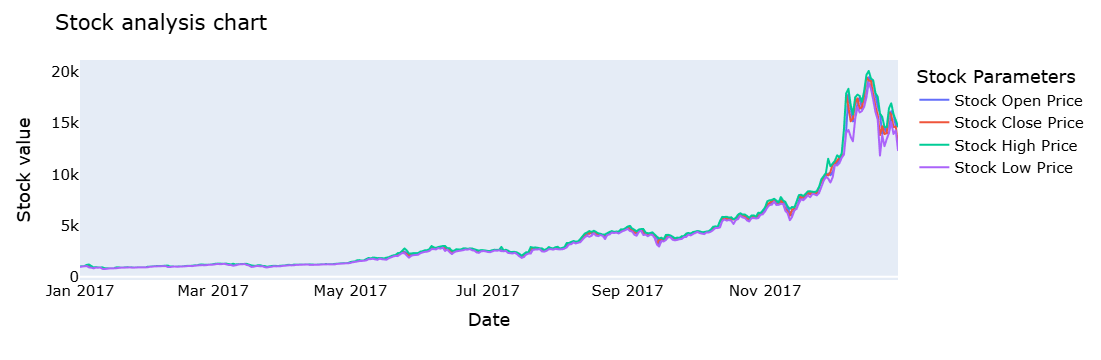

In [967]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2017, x=y_2017.Date, y=[y_2017['Open'], y_2017['Close'], 
                                          y_2017['High'], y_2017['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Analysis of year 2018

In [969]:
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d" " 00:00:00+00:00")

y_2018 = data.loc[(data['Date'] >= '2018-01-01')
                     & (data['Date'] < '2018-12-31')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)

Date         Close          High           Low          Open  Year  \
1089 2018-01-01  13657.200200  14112.200200  13154.700200  14112.200200  2018   
1090 2018-01-02  14982.099610  15444.599610  13163.599610  13625.000000  2018   
1091 2018-01-03  15201.000000  15572.799800  14844.500000  14978.200200  2018   
1092 2018-01-04  15599.200200  15739.700200  14522.200200  15270.700200  2018   
1093 2018-01-05  17429.500000  17705.199220  15202.799800  15477.200200  2018   
...         ...           ...           ...           ...           ...   ...   
1448 2018-12-26   3857.297607   3893.359619   3769.863770   3819.666748  2018   
1449 2018-12-27   3654.833496   3874.416992   3645.448486   3854.688477  2018   
1450 2018-12-28   3923.918701   3956.135986   3642.632080   3653.131836  2018   
1451 2018-12-29   3820.408691   3963.758789   3820.408691   3932.491699  2018   
1452 2018-12-30   3865.952637   3901.908936   3797.219238   3822.384766  2018   

      Month  Day  Weekday  7_day_MA_Close   Lag_1_Close   Lag_7_Close  \
1089      1    1        0    14566.685830  14156.400390  14026.599610   
1090      1    2        1    14407.014370  13657.200200  16099.799800   
1091      1    3        2    14315.942940  14982.099610  15838.500000   
1092      1    4        3    14457.757260  15201.000000  14606.500000   
1093      1    5        4    14853.942940  15599.200200  14656.200200   
...     ...  ...      ...             ...           ...           ...   
1448     12   26        2     3970.790771   3815.490723   3745.950684   
1449     12   27        3     3902.275356   3857.297607   4134.441406   
1450     12   28        4     3906.186070   3654.833496   3896.543701   
1451     12   29        5     3878.504081   3923.918701   4014.182617   
1452     12   30        6     3859.500139   3820.408691   3998.980225   

      Pct_Change_Close  
1089         -3.526321  
1090          9.701106  
1091          1.461080  
1092          2.619566  
1093         11.733293  
...                ...  
1448          1.095714  
1449         -5.248859  
1450          7.362448  
1451         -2.637924  
1452          1.192122  

[364 rows x 13 columns]

In [970]:
#month wise onpen and closing price
monthvise= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    13212.074219  13085.558090
February    9462.242920   9472.001151
March       9156.591718   9040.557097
April       7963.618311   8033.596631
May         8505.240675   8450.997732
June        6829.257975   6793.507666
July        7101.466450   7146.349987
August      6723.800955   6700.129946
September   6622.821338   6610.675033
October     6494.016491   6485.118747
November    5481.615120   5404.250171
December    3721.796305   3716.647941

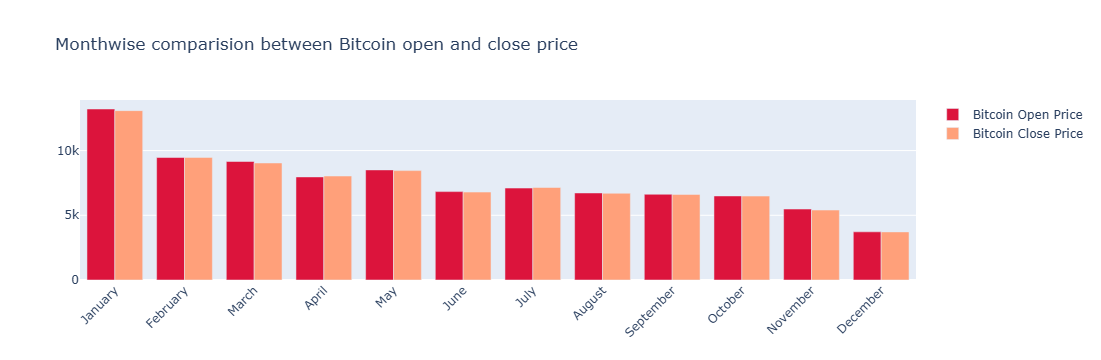

In [971]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

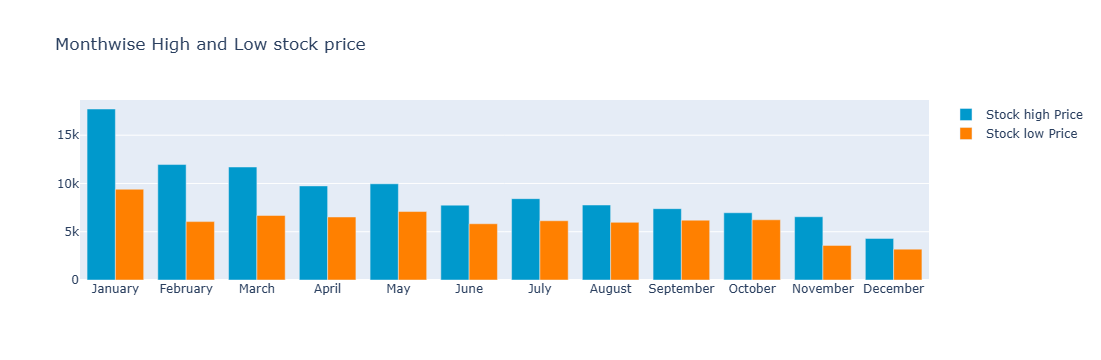

In [972]:
y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2018.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

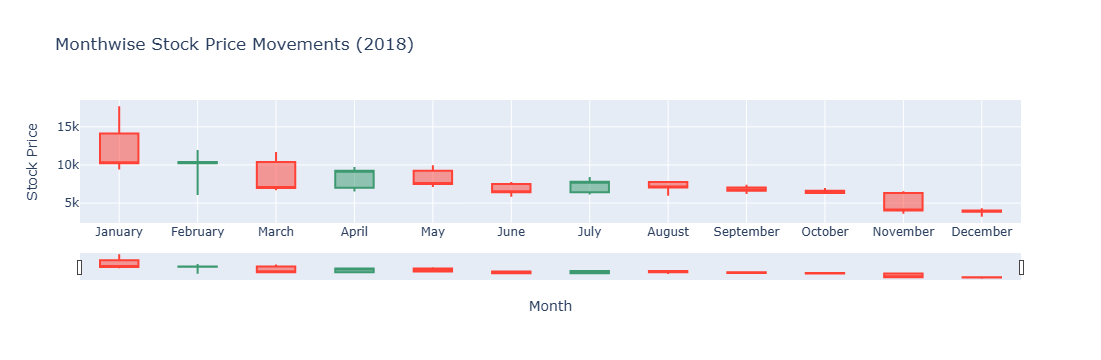

In [973]:
y_2018.loc[:, 'Date'] = pd.to_datetime(y_2018['Date'])

# Group by month
monthly_data = y_2018.groupby(y_2018['Date'].dt.strftime('%B')).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

# Reindex to maintain the correct month order
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = monthly_data.reindex(new_order, axis=0)

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=monthly_data.index,
    open=monthly_data['Open'],
    high=monthly_data['High'],
    low=monthly_data['Low'],
    close=monthly_data['Close']
)])

# Update layout
fig.update_layout(
    title='Monthwise Stock Price Movements (2018)',
    xaxis_title='Month',
    yaxis_title='Stock Price',
    xaxis=dict(type='category'),  # Ensures correct ordering of months
    template='plotly'
)

fig.show()

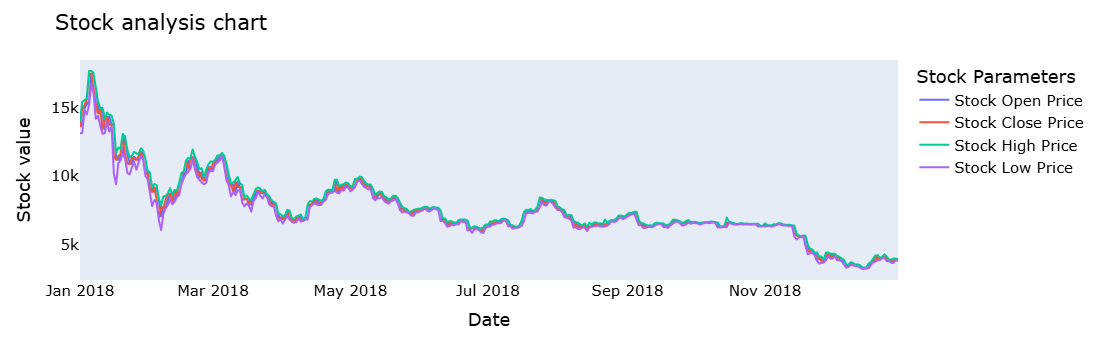

In [974]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2018, x=y_2018.Date, y=[y_2018['Open'], y_2018['Close'], 
                                          y_2018['High'], y_2018['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Analysis of year 2019

In [976]:
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d" " 00:00:00+00:00")

y_2019 = data.loc[(data['Date'] >= '2019-01-01')
                     & (data['Date'] < '2019-12-31')]

y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)

Date        Close         High          Low         Open  Year  \
1454 2019-01-01  3843.520020  3850.913818  3707.231201  3746.713379  2019   
1455 2019-01-02  3943.409424  3947.981201  3817.409424  3849.216309  2019   
1456 2019-01-03  3836.741211  3935.685059  3826.222900  3931.048584  2019   
1457 2019-01-04  3857.717529  3865.934570  3783.853760  3832.040039  2019   
1458 2019-01-05  3845.194580  3904.903076  3836.900146  3851.973877  2019   
...         ...          ...          ...          ...          ...   ...   
1813 2019-12-26  7238.966797  7388.302734  7200.386719  7274.799316  2019   
1814 2019-12-27  7290.088379  7363.529297  7189.934082  7238.141113  2019   
1815 2019-12-28  7317.990234  7399.041016  7286.905273  7289.031250  2019   
1816 2019-12-29  7422.652832  7513.948242  7279.865234  7317.647461  2019   
1817 2019-12-30  7292.995117  7454.824219  7276.308105  7420.272949  2019   

      Month  Day  Weekday  7_day_MA_Close  Lag_1_Close  Lag_7_Close  \
1454      1    1        1     3815.518799  3742.700439  3815.490723   
1455      1    2        2     3827.820487  3843.520020  3857.297607   
1456      1    3        3     3853.807303  3943.409424  3654.833496   
1457      1    4        4     3844.349993  3836.741211  3923.918701   
1458      1    5        5     3847.890834  3857.717529  3820.408691   
...     ...  ...      ...             ...          ...          ...   
1813     12   26        3     7301.978167  7275.155762  7202.844238   
1814     12   27        4     7312.159877  7238.966797  7218.816406   
1815     12   28        5     7330.278669  7290.088379  7191.158691   
1816     12   29        6     7317.573521  7317.990234  7511.588867   
1817     12   30        0     7308.625907  7422.652832  7355.628418   

      Pct_Change_Close  
1454          2.693766  
1455          2.598904  
1456         -2.704974  
1457          0.546722  
1458         -0.324621  
...                ...  
1813         -0.497432  
1814          0.706200  
1815          0.382737  
1816          1.430210  
1817         -1.746784  

[364 rows x 13 columns]

In [977]:
#month wise onpen and closing price
monthvise= y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January     3709.705645   3701.554963
February    3697.178327   3711.907261
March       3967.740400   3976.069100
April       5136.813314   5178.469434
May         7205.208024   7309.694131
June        9339.480322   9415.900179
July       10691.706055  10669.336158
August     10657.745620  10643.248362
September   9858.141813   9814.067871
October     8382.432129   8411.929168
November    8427.103516   8373.572412
December    7296.415381   7287.026839

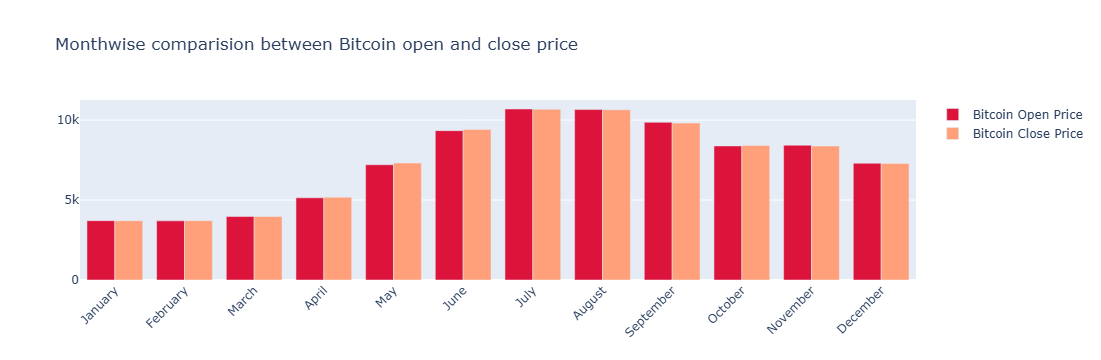

In [978]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

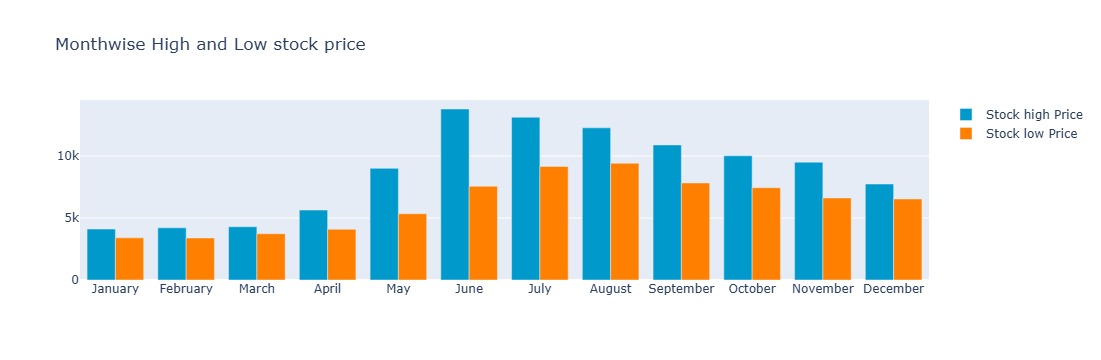

In [979]:
y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2019.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

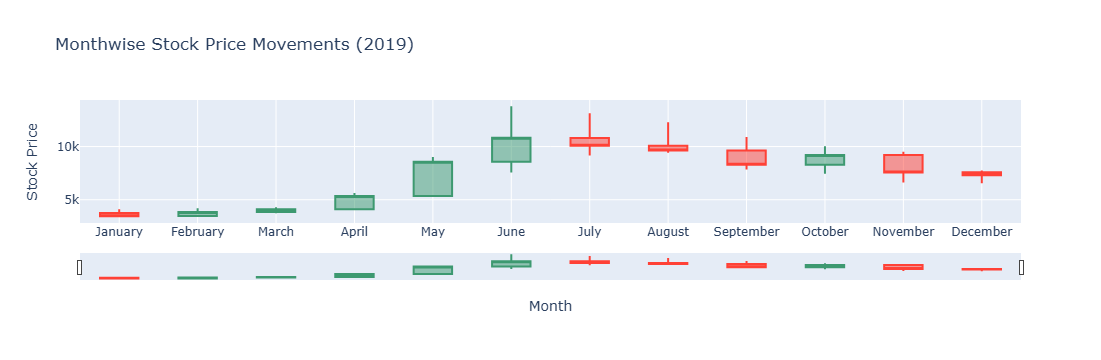

In [980]:
y_2019.loc[:, 'Date'] = pd.to_datetime(y_2019['Date'])

# Group by month
monthly_data = y_2019.groupby(y_2019['Date'].dt.strftime('%B')).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

# Reindex to maintain the correct month order
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = monthly_data.reindex(new_order, axis=0)

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=monthly_data.index,
    open=monthly_data['Open'],
    high=monthly_data['High'],
    low=monthly_data['Low'],
    close=monthly_data['Close']
)])

# Update layout
fig.update_layout(
    title='Monthwise Stock Price Movements (2019)',
    xaxis_title='Month',
    yaxis_title='Stock Price',
    xaxis=dict(type='category'),  # Ensures correct ordering of months
    template='plotly'
)

fig.show()

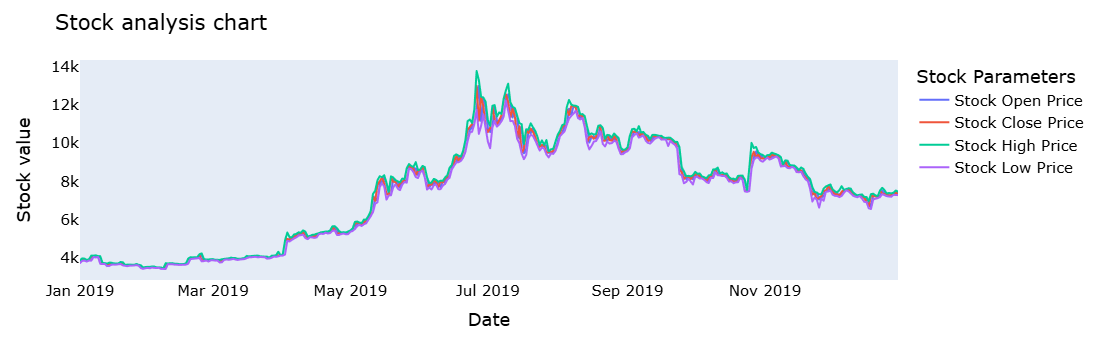

In [981]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2019, x=y_2019.Date, y=[y_2019['Open'], y_2019['Close'], 
                                          y_2019['High'], y_2019['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Analysis of year 2020

In [983]:
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d" " 00:00:00+00:00")

y_2020 = data.loc[(data['Date'] >= '2020-01-01')
                     & (data['Date'] < '2020-12-31')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

Date         Close          High           Low          Open  Year  \
1819 2020-01-01   7200.174316   7254.330566   7174.944336   7194.892090  2020   
1820 2020-01-02   6985.470215   7212.155273   6935.270020   7202.551270  2020   
1821 2020-01-03   7344.884277   7413.715332   6914.996094   6984.428711  2020   
1822 2020-01-04   7410.656738   7427.385742   7309.514160   7345.375488  2020   
1823 2020-01-05   7411.317383   7544.497070   7400.535645   7410.451660  2020   
...         ...           ...           ...           ...           ...   ...   
2179 2020-12-26  26437.037110  26718.070310  24522.689450  24677.015630  2020   
2180 2020-12-27  26272.294920  28288.839840  25922.769530  26439.373050  2020   
2181 2020-12-28  27084.808590  27389.111330  26207.640630  26280.822270  2020   
2182 2020-12-29  27362.437500  27370.720700  25987.298830  27081.810550  2020   
2183 2020-12-30  28840.953130  28937.740230  27360.089840  27360.089840  2020   

      Month  Day  Weekday  7_day_MA_Close   Lag_1_Close   Lag_7_Close  \
1819      1    1        2     7279.495257   7193.599121   7275.155762   
1820      1    2        3     7243.281459   7200.174316   7238.966797   
1821      1    3        4     7251.109445   6985.470215   7290.088379   
1822      1    4        5     7264.347517   7344.884277   7317.990234   
1823      1    5        6     7262.728167   7410.656738   7422.652832   
...     ...  ...      ...             ...           ...           ...   
2179     12   26        5    24020.361330  24664.791020  23869.832030   
2180     12   27        6    24419.647040  26437.037110  23477.294920   
2181     12   28        0    25031.322270  26272.294920  22803.082030   
2182     12   29        1    25542.666290  27084.808590  23783.029300   
2183     12   30        2    26342.610210  27362.437500  23241.345700   

      Pct_Change_Close  
1819          0.091403  
1820         -2.981929  
1821          5.145166  
1822          0.895487  
1823          0.008915  
...                ...  
2179          7.185328  
2180         -0.623149  
2181          3.092663  
2182          1.025036  
2183          5.403450  

[365 rows x 13 columns]

In [984]:
#month wise onpen and closing price
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January     8318.949597   8389.270476
February    9656.215114   9630.722185
March       6943.507009   6871.016113
April       7150.611328   7224.477328
May         9237.761530   9263.151745
June        9499.797005   9489.227213
July        9519.383852   9589.899729
August     11639.097216  11652.394185
September  10689.700163  10660.276856
October    11791.307492  11886.978201
November   16450.121648  16645.757421
December   21441.839715  21749.184311

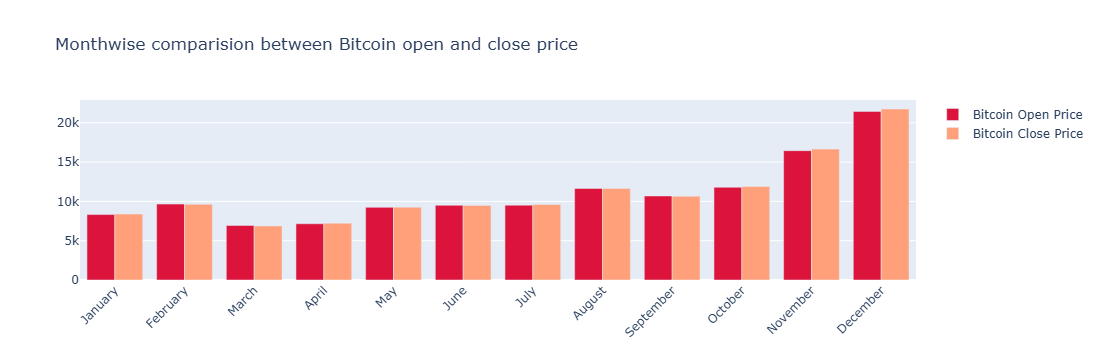

In [985]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

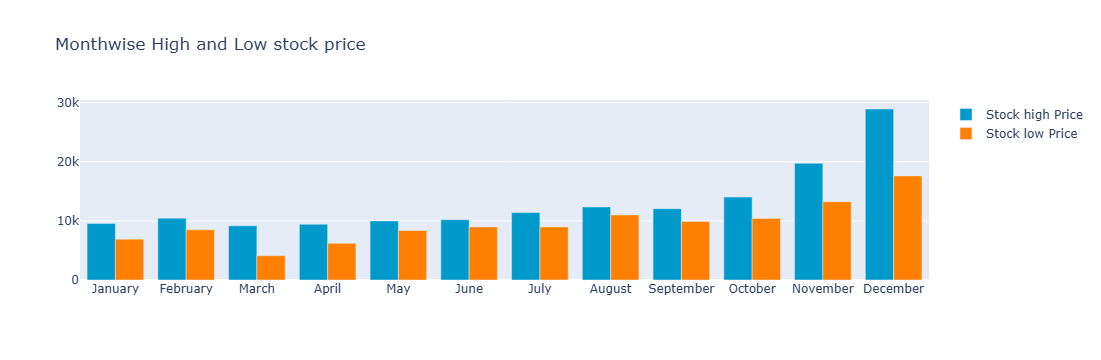

In [986]:
y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2020.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

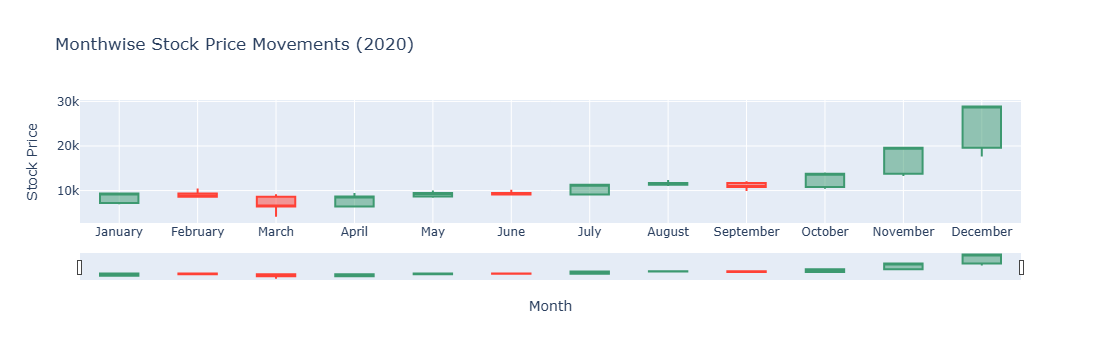

In [987]:
y_2020.loc[:, 'Date'] = pd.to_datetime(y_2020['Date'])

# Group by month
monthly_data = y_2020.groupby(y_2020['Date'].dt.strftime('%B')).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

# Reindex to maintain the correct month order
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = monthly_data.reindex(new_order, axis=0)

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=monthly_data.index,
    open=monthly_data['Open'],
    high=monthly_data['High'],
    low=monthly_data['Low'],
    close=monthly_data['Close']
)])

# Update layout
fig.update_layout(
    title='Monthwise Stock Price Movements (2020)',
    xaxis_title='Month',
    yaxis_title='Stock Price',
    xaxis=dict(type='category'),  # Ensures correct ordering of months
    template='plotly'
)

fig.show()

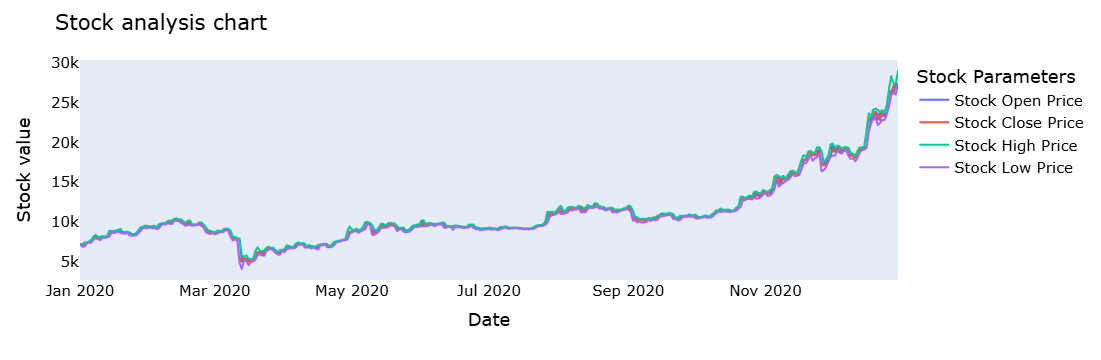

In [988]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Open'], y_2020['Close'], 
                                          y_2020['High'], y_2020['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Analysis of year 2021

In [990]:
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d" " 00:00:00+00:00")

y_2021 = data.loc[(data['Date'] >= '2021-01-01')
                     & (data['Date'] < '2021-12-31')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

Date        Close         High          Low         Open  Year  \
2185 2021-01-01  29374.15234  29600.62695  28803.58594  28994.00977  2021   
2186 2021-01-02  32127.26758  33155.11719  29091.18164  29376.45508  2021   
2187 2021-01-03  32782.02344  34608.55859  32052.31641  32129.40820  2021   
2188 2021-01-04  31971.91406  33440.21875  28722.75586  32810.94922  2021   
2189 2021-01-05  33992.42969  34437.58984  30221.18750  31977.04102  2021   
...         ...          ...          ...          ...          ...   ...   
2544 2021-12-26  50809.51563  51196.37891  49623.10547  50428.69141  2021   
2545 2021-12-27  50640.41797  51956.32813  50499.46875  50802.60938  2021   
2546 2021-12-28  47588.85547  50679.85938  47414.21094  50679.85938  2021   
2547 2021-12-29  46444.71094  48119.74219  46201.49609  47623.87109  2021   
2548 2021-12-30  47178.12500  47879.96484  46060.31250  46490.60547  2021   

      Month  Day  Weekday  7_day_MA_Close  Lag_1_Close  Lag_7_Close  \
2185      1    1        4     27767.62918  29001.72070  24664.79102   
2186      1    2        5     28580.51925  29374.15234  26437.03711   
2187      1    3        6     29510.48047  32127.26758  26272.29492   
2188      1    4        0     30208.63839  32782.02344  27084.80859   
2189      1    5        1     31155.78013  31971.91406  27362.43750   
...     ...  ...      ...             ...          ...          ...   
2544     12   26        6     49613.07310  50429.85938  46707.01563   
2545     12   27        0     50150.23605  50809.51563  46880.27734   
2546     12   28        1     49957.69922  50640.41797  48936.61328   
2547     12   29        2     49645.72768  47588.85547  48628.51172   
2548     12   30        3     49130.52567  46444.71094  50784.53906   

      Pct_Change_Close  
2185          1.284171  
2186          9.372578  
2187          2.038007  
2188         -2.471200  
2189          6.319658  
...                ...  
2544          0.752840  
2545         -0.332807  
2546         -6.025943  
2547         -2.404228  
2548          1.579112  

[364 rows x 13 columns]

In [991]:
#month wise onpen and closing price
monthvise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    34652.961695  34761.649952
February   45874.967217  46306.798967
March      54544.678177  54998.008695
April      57251.256250  57206.720053
May        47105.828503  46443.286669
June       35920.546941  35845.154688
July       34234.212451  34444.973792
August     45516.119835  45709.022682
September  46041.859376  45939.771485
October    57344.743951  57911.970516
November   60857.520314  60621.488803
December   49753.779819  49361.767970

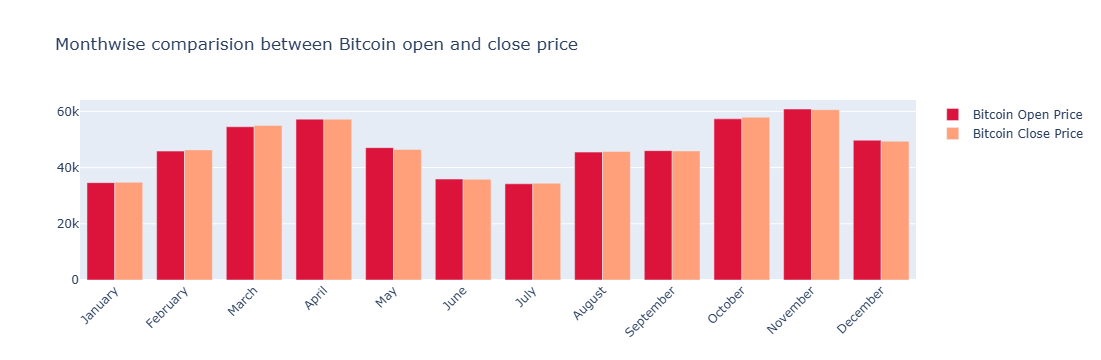

In [992]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

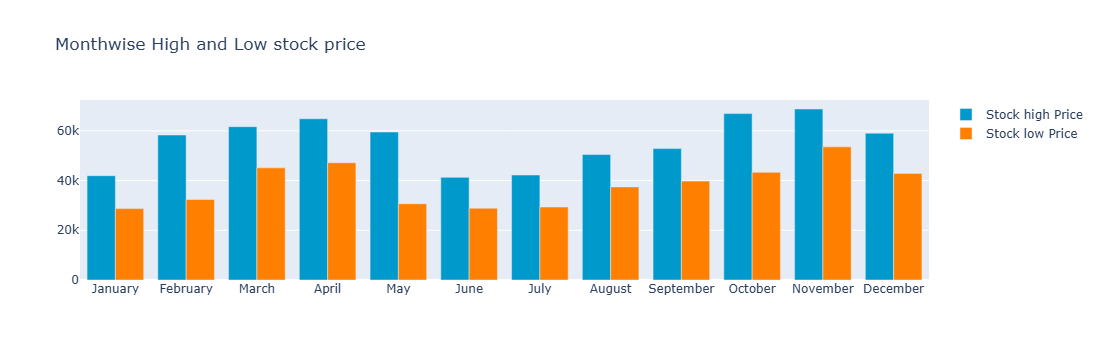

In [993]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2021.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

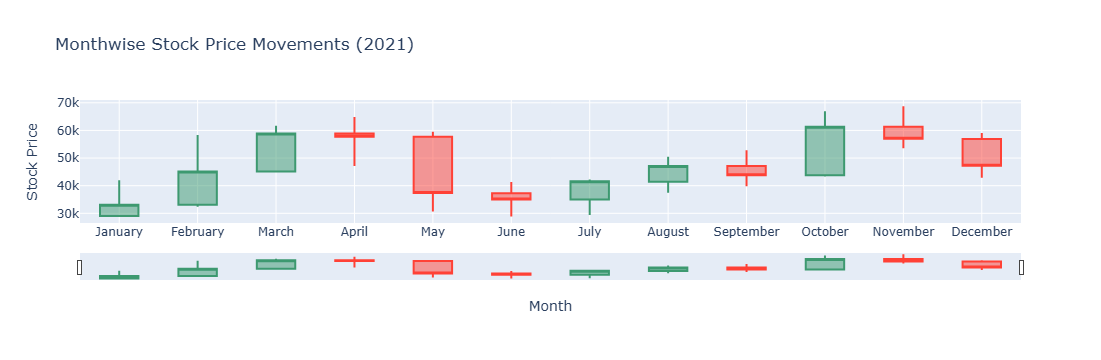

In [994]:
y_2021.loc[:, 'Date'] = pd.to_datetime(y_2021['Date'])

# Group by month
monthly_data = y_2021.groupby(y_2021['Date'].dt.strftime('%B')).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

# Reindex to maintain the correct month order
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = monthly_data.reindex(new_order, axis=0)

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=monthly_data.index,
    open=monthly_data['Open'],
    high=monthly_data['High'],
    low=monthly_data['Low'],
    close=monthly_data['Close']
)])

# Update layout
fig.update_layout(
    title='Monthwise Stock Price Movements (2021)',
    xaxis_title='Month',
    yaxis_title='Stock Price',
    xaxis=dict(type='category'),  # Ensures correct ordering of months
    template='plotly'
)

fig.show()

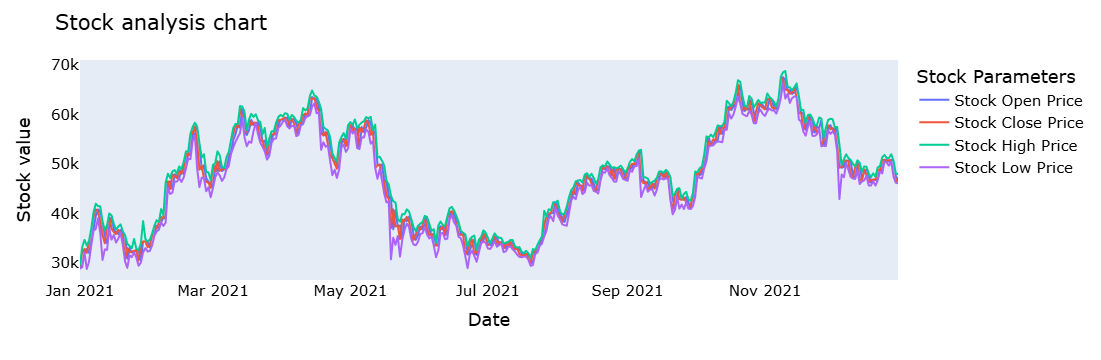

In [995]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'], 
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Analysis of year 2022

In [997]:
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d" " 00:00:00+00:00")

y_2022 = data.loc[(data['Date'] >= '2022-01-01')
                     & (data['Date'] < '2022-12-31')]

y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

Date        Close         High          Low         Open  Year  \
2550 2022-01-01  47686.81250  47827.31250  46288.48438  46311.74609  2022   
2551 2022-01-02  47345.21875  47881.40625  46856.93750  47680.92578  2022   
2552 2022-01-03  46458.11719  47510.72656  45835.96484  47343.54297  2022   
2553 2022-01-04  45897.57422  47406.54688  45752.46484  46458.85156  2022   
2554 2022-01-05  43569.00391  46929.04688  42798.22266  45899.35938  2022   
...         ...          ...          ...          ...          ...   ...   
2909 2022-12-26  16919.80469  16920.12305  16812.36914  16842.25000  2022   
2910 2022-12-27  16717.17383  16959.84570  16642.07227  16919.29102  2022   
2911 2022-12-28  16552.57227  16768.16992  16497.55664  16716.40039  2022   
2912 2022-12-29  16642.34180  16651.75586  16508.68359  16552.32227  2022   
2913 2022-12-30  16602.58594  16643.42773  16408.47461  16641.33008  2022   

      Month  Day  Weekday  7_day_MA_Close  Lag_1_Close  Lag_7_Close  \
2550      1    1        5     48093.55469  46306.44531  50429.85938   
2551      1    2        6     47598.65513  47686.81250  50809.51563   
2552      1    3        0     47001.18359  47345.21875  50640.41797   
2553      1    4        1     46759.57199  46458.11719  47588.85547   
2554      1    5        2     46348.75670  45897.57422  46444.71094   
...     ...  ...      ...             ...          ...          ...   
2909     12   26        0     16851.52595  16841.98633  16439.67969   
2910     12   27        1     16824.50726  16919.80469  16906.30469   
2911     12   28        2     16786.65542  16717.17383  16817.53516   
2912     12   29        3     16759.79827  16552.57227  16830.34180   
2913     12   30        4     16732.03153  16642.34180  16796.95313   

      Pct_Change_Close  
2550          2.980940  
2551         -0.716327  
2552         -1.873688  
2553         -1.206556  
2554         -5.073406  
...                ...  
2909          0.462050  
2910         -1.197596  
2911         -0.984626  
2912          0.542330  
2913         -0.238884  

[364 rows x 13 columns]

In [998]:
#month wise onpen and closing price
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    41368.073463  41114.422380
February   40591.103934  40763.474053
March      41889.148438  41966.237526
April      41694.653646  41435.319662
May        31900.711128  31706.105218
June       24783.338477  24383.685483
July       21424.733053  21539.253843
August     22471.866558  22366.266318
September  19821.353711  19804.779231
October    19616.090285  19650.525643
November   17711.480599  17600.814323
December   16981.775652  16963.012566

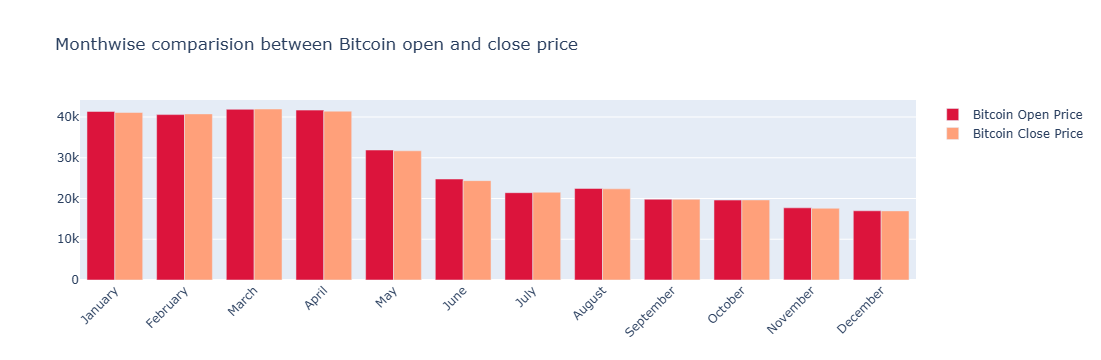

In [999]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

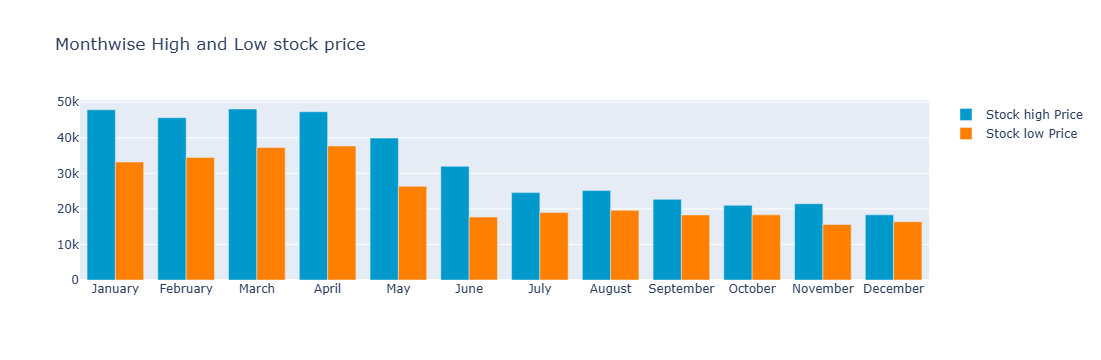

In [1000]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

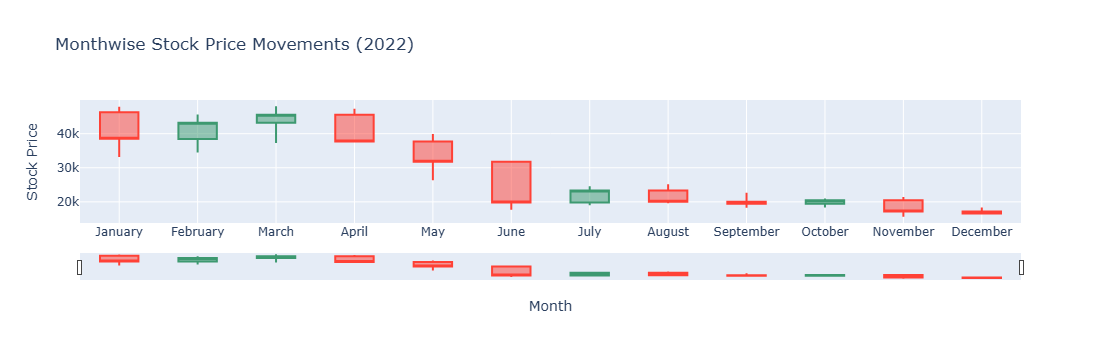

In [1001]:
y_2022.loc[:, 'Date'] = pd.to_datetime(y_2022['Date'])

# Group by month
monthly_data = y_2022.groupby(y_2022['Date'].dt.strftime('%B')).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

# Reindex to maintain the correct month order
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = monthly_data.reindex(new_order, axis=0)

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=monthly_data.index,
    open=monthly_data['Open'],
    high=monthly_data['High'],
    low=monthly_data['Low'],
    close=monthly_data['Close']
)])

# Update layout
fig.update_layout(
    title='Monthwise Stock Price Movements (2022)',
    xaxis_title='Month',
    yaxis_title='Stock Price',
    xaxis=dict(type='category'),  # Ensures correct ordering of months
    template='plotly'
)

fig.show()

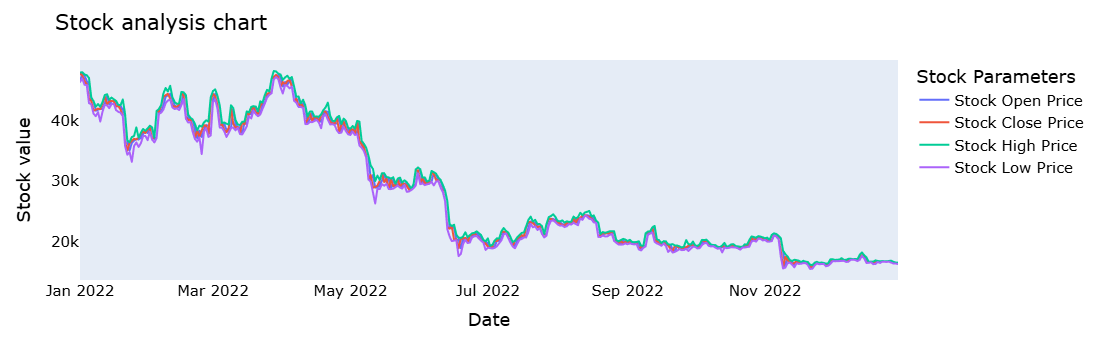

In [1002]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'], 
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Analysis of year 2023

In [1004]:
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d" " 00:00:00+00:00")

y_2023 = data.loc[(data['Date'] >= '2023-01-01')
                     & (data['Date'] < '2023-12-31')]

y_2023.drop(y_2023[['Adj Close','Volume']],axis=1)

Date        Close         High          Low         Open  Year  \
2915 2023-01-01  16625.08008  16630.43945  16521.23438  16547.91406  2023   
2916 2023-01-02  16688.47070  16759.34375  16572.22852  16625.50977  2023   
2917 2023-01-03  16679.85742  16760.44727  16622.37109  16688.84766  2023   
2918 2023-01-04  16863.23828  16964.58594  16667.76367  16680.20508  2023   
2919 2023-01-05  16836.73633  16884.02148  16790.28320  16863.47266  2023   
...         ...          ...          ...          ...          ...   ...   
3274 2023-12-26  42520.40234  43603.17578  41676.48828  43599.84766  2023   
3275 2023-12-27  43442.85547  43683.16016  42167.58203  42518.46875  2023   
3276 2023-12-28  42627.85547  43804.78125  42318.55078  43468.19922  2023   
3277 2023-12-29  42099.40234  43124.32422  41424.06250  42614.64453  2023   
3278 2023-12-30  42156.90234  42584.12500  41556.22656  42091.75391  2023   

      Month  Day  Weekday  7_day_MA_Close  Lag_1_Close  Lag_7_Close  \
2915      1    1        6     16658.15067  16547.49609  16841.98633   
2916      1    2        0     16625.10296  16625.08008  16919.80469   
2917      1    3        1     16619.77204  16688.47070  16717.17383   
2918      1    4        2     16664.15290  16679.85742  16552.57227   
2919      1    5        3     16691.92355  16863.23828  16642.34180   
...     ...  ...      ...             ...          ...          ...   
3274     12   26        1     43486.92969  43613.14063  42270.52734   
3275     12   27        2     43457.01618  42520.40234  43652.25000   
3276     12   28        3     43279.68806  43442.85547  43869.15234   
3277     12   29        4     43008.47377  42627.85547  43997.90234   
3278     12   30        5     42782.38225  42099.40234  43739.54297   

      Pct_Change_Close  
2915          0.468856  
2916          0.381295  
2917         -0.051612  
2918          1.099415  
2919         -0.157158  
...                ...  
3274         -2.505525  
3275          2.169437  
3276         -1.876028  
3277         -1.239690  
3278          0.136582  

[364 rows x 13 columns]

In [1005]:
#month wise onpen and closing price
monthvise= y_2023.groupby(y_2023['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    20043.860132  20250.717490
February   23304.086008  23304.539203
March      24945.340412  25116.900895
April      28823.841731  28857.574544
May        27562.723162  27499.307145
June       27651.926759  27763.198438
July       30098.767578  30057.469947
August     27959.756615  27852.792844
September  26271.268229  26306.136394
October    29511.811115  29755.895161
November   36491.666668  36596.164844
December   42409.761589  42556.283724

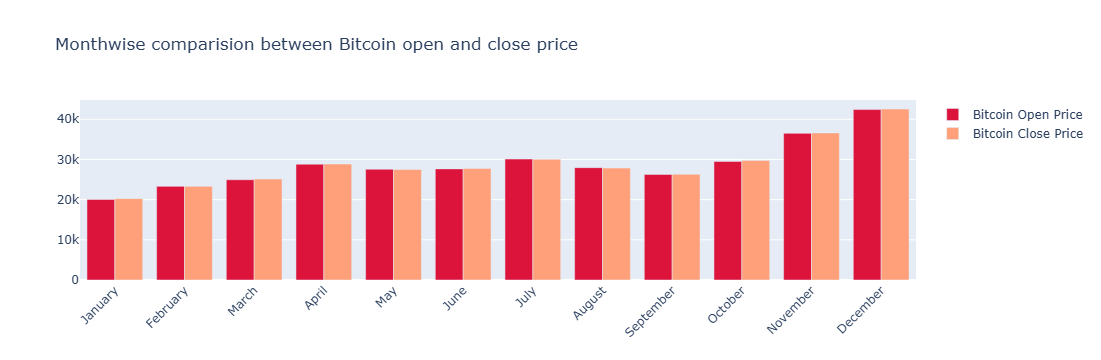

In [1006]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

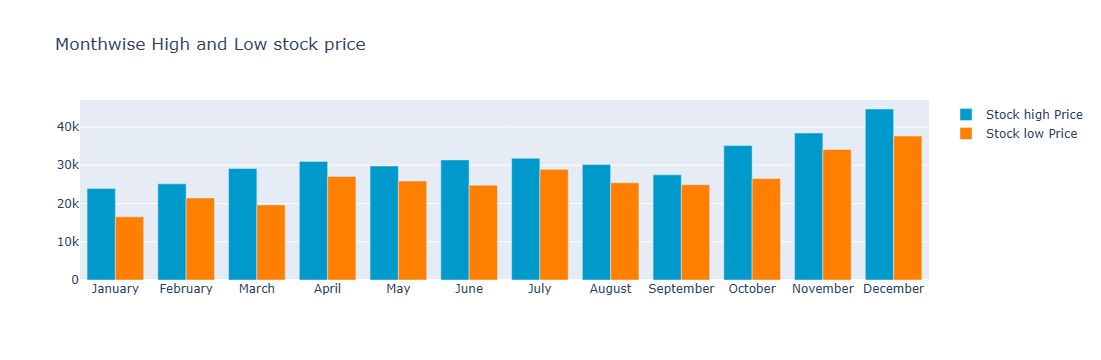

In [1007]:
y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2023.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

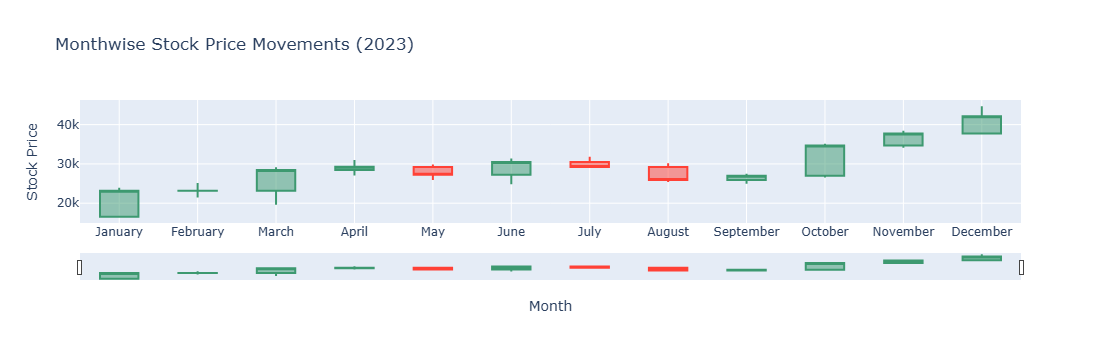

In [1008]:
y_2023.loc[:, 'Date'] = pd.to_datetime(y_2023['Date'])

# Group by month
monthly_data = y_2023.groupby(y_2023['Date'].dt.strftime('%B')).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

# Reindex to maintain the correct month order
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = monthly_data.reindex(new_order, axis=0)

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=monthly_data.index,
    open=monthly_data['Open'],
    high=monthly_data['High'],
    low=monthly_data['Low'],
    close=monthly_data['Close']
)])

# Update layout
fig.update_layout(
    title='Monthwise Stock Price Movements (2023)',
    xaxis_title='Month',
    yaxis_title='Stock Price',
    xaxis=dict(type='category'),  # Ensures correct ordering of months
    template='plotly'
)

fig.show()

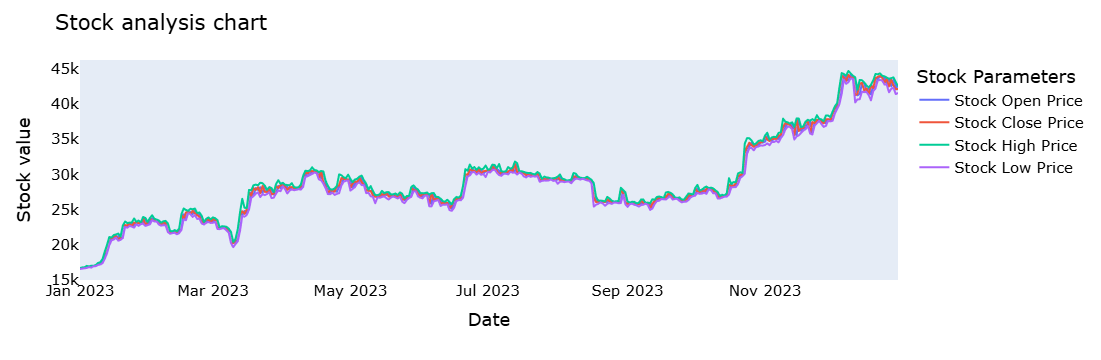

In [1009]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2023, x=y_2023.Date, y=[y_2023['Open'], y_2023['Close'], 
                                          y_2023['High'], y_2023['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Analysis of year 2024

In [1011]:
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d" " 00:00:00+00:00")

y_2024 = data.loc[(data['Date'] >= '2024-01-01')
                     & (data['Date'] < '2024-11-15')]

y_2024.drop(y_2024[['Adj Close','Volume']],axis=1)

Date        Close         High          Low         Open  Year  \
3280 2024-01-01  44167.33203  44175.43750  42214.97656  42280.23438  2024   
3281 2024-01-02  44957.96875  45899.70703  44176.94922  44187.14063  2024   
3282 2024-01-03  42848.17578  45503.24219  40813.53516  44961.60156  2024   
3283 2024-01-04  44179.92188  44770.02344  42675.17578  42855.81641  2024   
3284 2024-01-05  44162.69141  44353.28516  42784.71875  44192.98047  2024   
...         ...          ...          ...          ...          ...   ...   
3594 2024-11-10  80474.18750  81474.42188  76565.42969  76775.54688  2024   
3595 2024-11-11  88701.48438  89604.50000  80283.25000  80471.41406  2024   
3596 2024-11-12  87955.81250  89956.88281  85155.10938  88705.56250  2024   
3597 2024-11-13  90584.16406  93434.35156  86256.92969  87929.96875  2024   
3598 2024-11-14  87250.42969  91765.21875  86682.81250  90574.88281  2024   

      Month  Day  Weekday  7_day_MA_Close  Lag_1_Close  Lag_7_Close  \
3280      1    1        0     42754.27678  42265.18750  43613.14063   
3281      1    2        1     43102.50056  44167.33203  42520.40234   
3282      1    3        2     43017.54632  44957.96875  43442.85547   
3283      1    4        3     43239.27009  42848.17578  42627.85547   
3284      1    5        4     43534.02567  44179.92188  42099.40234   
...     ...  ...      ...             ...          ...          ...   
3594     11   10        6     74644.79130  76778.86719  68741.11719   
3595     11   11        0     77629.07366  80474.18750  67811.50781   
3596     11   12        1     80285.68081  88701.48438  69359.56250   
3597     11   13        2     82420.69308  87955.81250  75639.07813   
3598     11   14        3     84041.48884  90584.16406  75904.85938   

      Pct_Change_Close  
3280          4.500499  
3281          1.790094  
3282         -4.692812  
3283          3.108058  
3284         -0.039001  
...                ...  
3594          4.812939  
3595         10.223523  
3596         -0.840653  
3597          2.988264  
3598         -3.680262  

[319 rows x 13 columns]

In [1012]:
#month wise onpen and closing price
monthvise= y_2024.groupby(y_2024['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    42910.015373  42919.612399
February   49231.727101  49875.174300
March      67372.752395  67702.439265
April      66239.900913  65882.380601
May        65044.212199  65266.317289
June       66058.262370  65899.465756
July       62737.764870  62804.542088
August     60103.896674  59921.197582
September  60213.192448  60358.515886
October    65361.905244  65577.264491
November   76247.470983  77465.592077
December            NaN           NaN

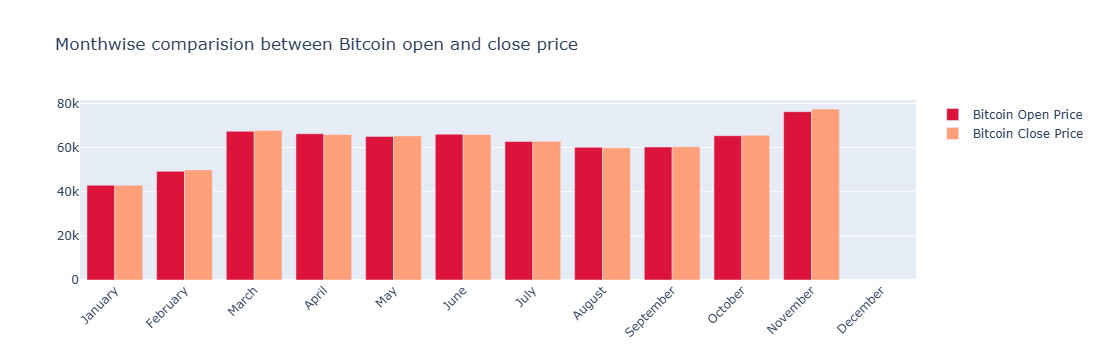

In [1013]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

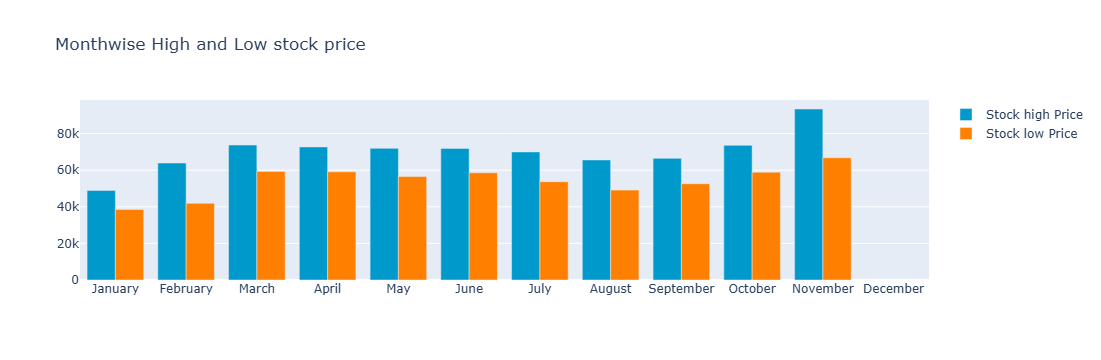

In [1014]:
y_2024.groupby(y_2024['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2024.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2024.groupby(y_2024['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

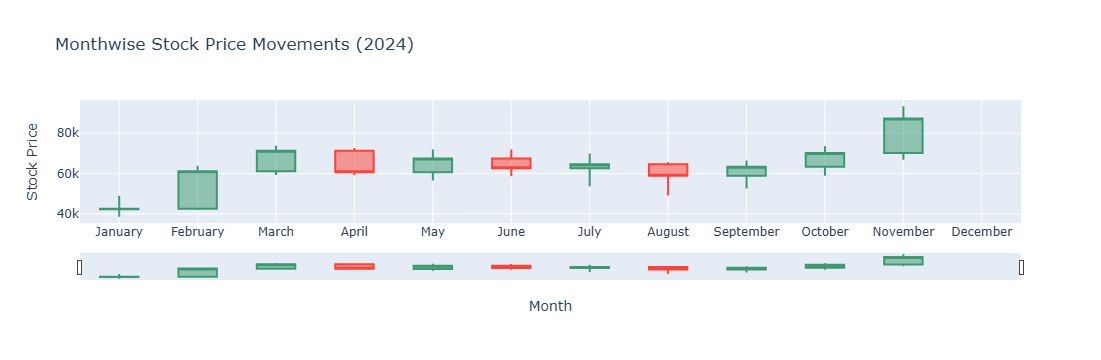

In [1015]:
y_2024.loc[:, 'Date'] = pd.to_datetime(y_2024['Date'])

# Group by month
monthly_data = y_2024.groupby(y_2024['Date'].dt.strftime('%B')).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

# Reindex to maintain the correct month order
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = monthly_data.reindex(new_order, axis=0)

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=monthly_data.index,
    open=monthly_data['Open'],
    high=monthly_data['High'],
    low=monthly_data['Low'],
    close=monthly_data['Close']
)])

# Update layout
fig.update_layout(
    title='Monthwise Stock Price Movements (2024)',
    xaxis_title='Month',
    yaxis_title='Stock Price',
    xaxis=dict(type='category'),  # Ensures correct ordering of months
    template='plotly'
)

fig.show()

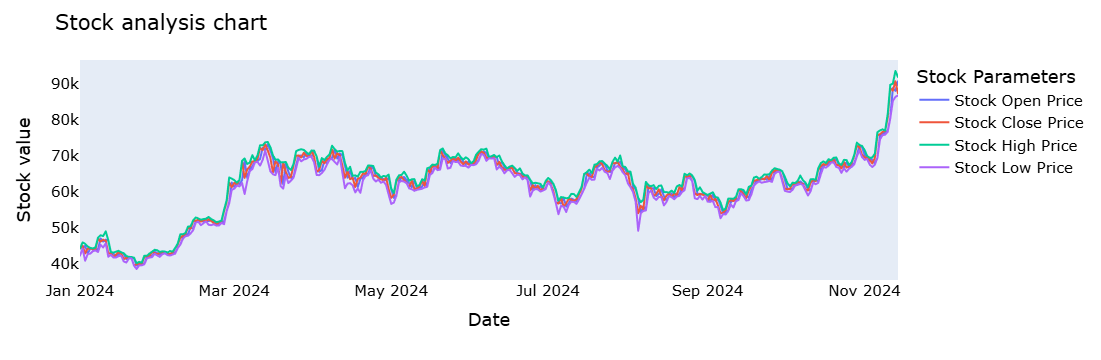

In [1016]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2024, x=y_2024.Date, y=[y_2024['Open'], y_2024['Close'], 
                                          y_2024['High'], y_2024['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Overall analysis form 2015-2024

In [1018]:
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d" " 00:00:00+00:00")

y_overall = data.loc[(data['Date'] >= '2015-01-01')
                     & (data['Date'] < '2024-11-15')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

Date         Close          High           Low          Open  Year  \
0    2015-01-08    283.348999    294.135010    282.174988    294.135010  2015   
1    2015-01-09    290.407989    291.114014    280.532989    282.382996  2015   
2    2015-01-10    274.795990    288.127014    273.966003    287.303009  2015   
3    2015-01-11    265.660004    279.638000    265.039001    274.608002  2015   
4    2015-01-12    267.795990    272.203003    265.200012    266.145996  2015   
...         ...           ...           ...           ...           ...   ...   
3594 2024-11-10  80474.187500  81474.421880  76565.429690  76775.546880  2024   
3595 2024-11-11  88701.484380  89604.500000  80283.250000  80471.414060  2024   
3596 2024-11-12  87955.812500  89956.882810  85155.109380  88705.562500  2024   
3597 2024-11-13  90584.164060  93434.351560  86256.929690  87929.968750  2024   
3598 2024-11-14  87250.429690  91765.218750  86682.812500  90574.882810  2024   

      Month  Day  Weekday  7_day_MA_Close   Lag_1_Close   Lag_7_Close  \
0         1    8        3      285.522574    294.337006    314.248993   
1         1    9        4      282.004857    283.348999    315.032013   
2         1   10        5      281.106855    290.407989    281.082001   
3         1   11        6      281.316140    274.795990    264.195007   
4         1   12        0      280.362139    265.660004    274.473999   
...     ...  ...      ...             ...           ...           ...   
3594     11   10        6    74644.791300  76778.867190  68741.117190   
3595     11   11        0    77629.073660  80474.187500  67811.507810   
3596     11   12        1    80285.680810  88701.484380  69359.562500   
3597     11   13        2    82420.693080  87955.812500  75639.078130   
3598     11   14        3    84041.488840  90584.164060  75904.859380   

      Pct_Change_Close  
0            -3.733138  
1             2.491271  
2            -5.375885  
3            -3.324643  
4             0.804030  
...                ...  
3594          4.812939  
3595         10.223523  
3596         -0.840653  
3597          2.988264  
3598         -3.680262  

[3599 rows x 13 columns]

In [1019]:
#month wise onpen and closing price
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    16955.730878  16956.064816
February   18365.801165  18492.403748
March      21063.951158  21148.616195
April      21612.753859  21569.501019
May        19912.383329  19853.319487
June       18358.866945  18310.729460
July       17925.908300  17971.216377
August     18972.632179  18955.636092
September  18443.383884  18439.850323
October    20469.668526  20594.815982
November   20045.001509  20100.108065
December   17573.750435  17587.905097

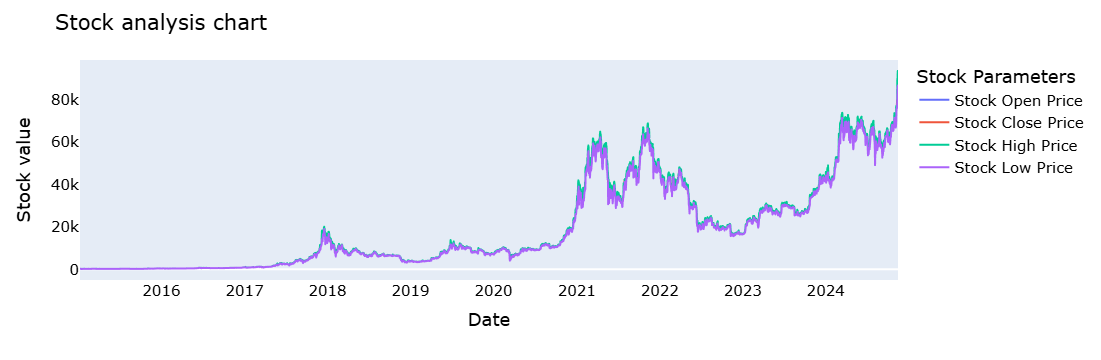

In [1020]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Building LSTM Model

Preparing Data for Training and Testing


In [1022]:
# Lets First Take all the Close Price 
closedf = data[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3599, 2)


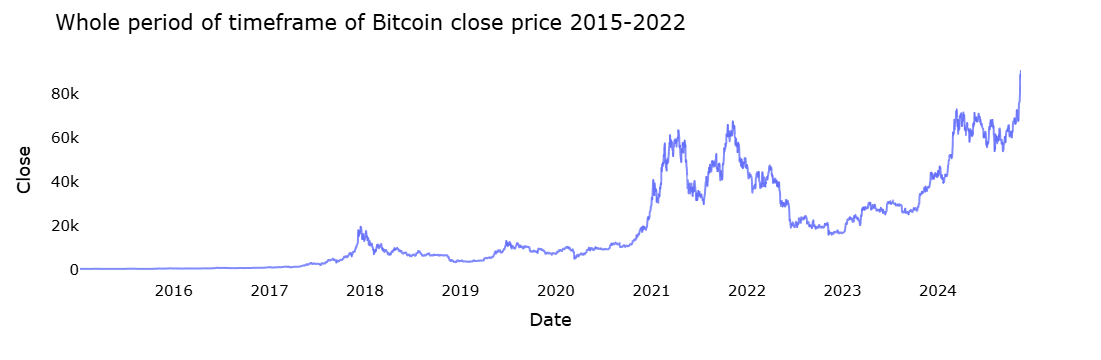

In [1023]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2015-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Take data form just 1 year

In [1025]:
closedf = closedf[closedf['Date'] > '2023-11-18']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  362


In [1026]:
closedf

Date        Close
3237 2023-11-19  37386.54688
3238 2023-11-20  37476.95703
3239 2023-11-21  35813.81250
3240 2023-11-22  37432.33984
3241 2023-11-23  37289.62109
...         ...          ...
3594 2024-11-10  80474.18750
3595 2024-11-11  88701.48438
3596 2024-11-12  87955.81250
3597 2024-11-13  90584.16406
3598 2024-11-14  87250.42969

[362 rows x 2 columns]

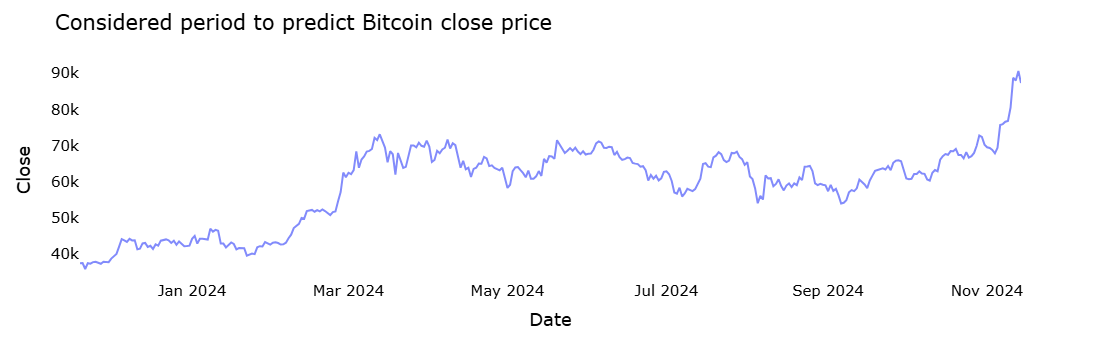

In [1027]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Normalizing Data

It use for data preparation for machine learning and the goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.



In [1029]:
# deleting date column and normalizing using MinMax Scaler
del closedf['Date']  # If 'closedf' is a DataFrame and you need to remove the 'Date' column
scaler = MinMaxScaler(feature_range=(0, 1))

# Transform the 'closedf' column
closedf = scaler.fit_transform(np.array(closedf).reshape(-1, 1))
print(closedf.shape)

(362, 1)


Slicing data into Training set and Testing set

In [1031]:
#we keep the training set as 60% and 40% testing set
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (217, 1)
test_data:  (145, 1)


Now we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 15

In [1033]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [1034]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (201, 15)
y_train:  (201,)
X_test:  (129, 15)
y_test (129,)


In [1035]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (201, 15, 1)
X_test:  (129, 15, 1)


Actuall Model Building

In [1037]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

C:\Users\Shaht\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [1188]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 9.3412e-04 - val_loss: 0.0019
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.6285e-04 - val_loss: 0.0018
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.5662e-04 - val_loss: 0.0018
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 9.3780e-04 - val_loss: 0.0018
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.3148e-04 - val_loss: 0.0019
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.1826e-04 - val_loss: 0.0018
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.6601e-04 - val_loss: 0.0018
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.1205e-04 - val_loss: 0.0018
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.1440e-04 - val_loss: 0.0018
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 

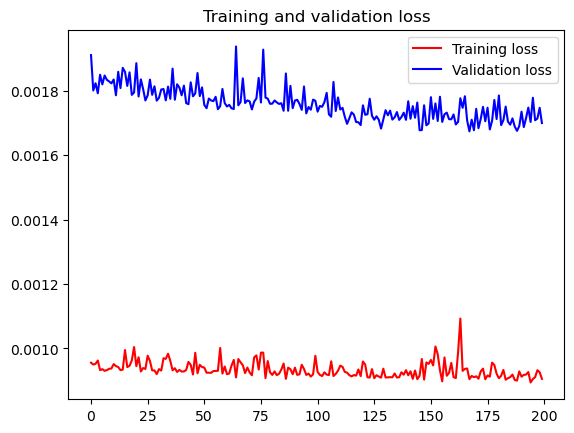

<Figure size 640x480 with 0 Axes>

In [1190]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [1192]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


((201, 1), (129, 1))

Model Evaluation

In [1195]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

Evaluation metrices RMSE, MSE and MAE

In [1198]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1641.8856711641338
Train data MSE:  2695788.5571740977
Train data MAE:  1230.8310013619398
-------------------------------------------------------------------------------------
Test data RMSE:  2258.459274393772
Test data MSE:  5100638.294095242
Test data MAE:  1602.4400436434105


Variance Regression Score

In [1201]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.978885291072843
Test data explained variance regression score: 0.8747838562515033


R square score for regression

In [1204]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9787619215273524
Test data R2 score: 0.8736511533473899


Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [1207]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0008142575573815224
Test data MGD:  0.0011442009738752983
----------------------------------------------------------------------
Train data MPD:  46.06436759181783
Test data MPD:  75.72027588921104


Comparision of original Bitcoin close price and predicted close price

Train predicted data:  (362, 1)
Test predicted data:  (362, 1)


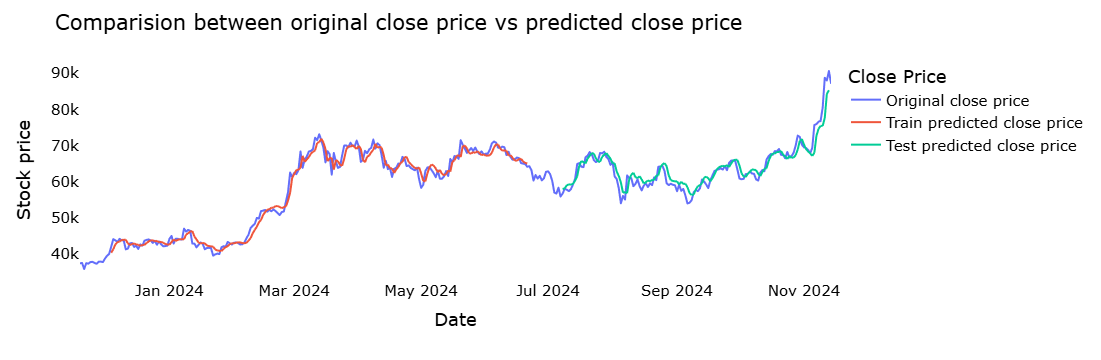

In [1210]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Predicting next 50 days

In [1213]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
    print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  1
Output of predicted next days:  2
Output of predicted next days:  3
Output of predicted next days:  4
Output of predicted next days:  5
Output of predicted next days:  6
Output of predicted next days:  7
Output of predicted next days:  8
Output of predicted next days:  9
Output of predicted next days:  10
Output of predicted next days:  11
Output of predicted next days:  12
Output of predicted next days:  13
Output of predicted next days:  14
Output of predicted next days:  15
Output of predicted next days:  16
Output of predicted next days:  17
Output of predicted next days:  18
Output of predicted next days:  19
Output of predicted next days:  20
Output of predicted next days:  21
Output of predicted next days:  22
Output of predicted next days:  23
Output of predicted next days:  24
Output of predicted next days:  25
Output of predicted next days:  26
Output of predicted next days:  27
Output of predicted next days:  28
Output of predicted next days

Plotting last 15 days of dataset and next predicted 30 days

In [1215]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


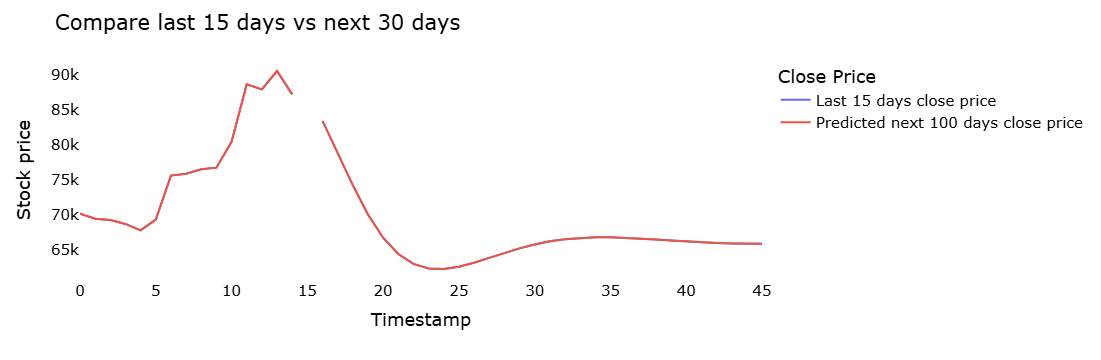

In [1218]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 100 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

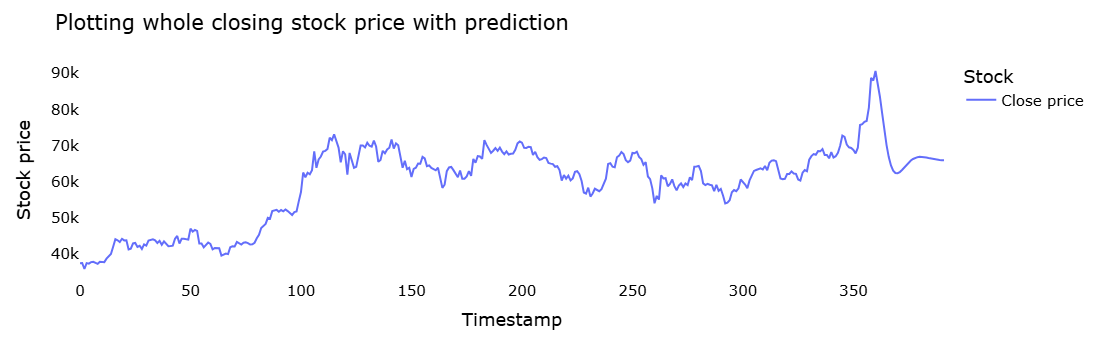

In [1220]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()